<a href="https://colab.research.google.com/github/chenhavecode/githubtest/blob/main/skripsi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drowsiness Detection Using LSTM in Tensorflow and Keras
Driving in a drowsy condition is one of the main causes of traffic accidents.

In this notebook, a neural network model is created using LSTM that is able to detect whether driver is in a sleepy condition



#### 0. Adding Resources





<br>

###### 0.1. Library Import
import useful libraries which needed to work on this project

In [ ]:
### useful libraries

## algebra and matrix operation
import numpy as np
from collections import deque

## dataframe
import pandas as pd

## data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## machine learning
# data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# model evaluation
from sklearn.metrics import classification_report,f1_score,accuracy_score, precision_score, recall_score

## others
import datetime
import time
import random
import sys
import os

## mount google drive
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
/drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<br>

###### 0.2. Data Import
Import the data that I have collected that will be used to create the classifier model



In [ ]:
datasets_path = "drive/My Drive/Skripsi/datasets/"

def import_datasets(datasets_path):
  df_list = {}
  for dataset in os.listdir(datasets_path):
    df = pd.read_csv(datasets_path+dataset)
    df_list[dataset] = df
  return df_list

df_list = import_datasets(datasets_path)

<br><br>

#### 1. Data Preprocessing


<br>

###### 1.1 Data Quicklook
see the basic things contained in the data that will be used to create a classifier

In [ ]:
print("total data: " + str(len(df_list)))

total data: 7


In [ ]:
print(os.listdir(datasets_path))

['data_yohannes.csv', 'data_pascal2.csv', 'data_pascal3.csv', 'data_diah.csv', 'data_pascal4.csv', 'data_pascal5.csv', 'data_pascal6.csv']


In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  display(df.sample(2))
  print("\n\n")

data_yohannes.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
7704   1585469291987        86.0  ...             0.991153          0
26206  1585472280471        90.0  ...             0.995264          1

[2 rows x 12 columns]




data_pascal2.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
19406  1586277978180        75.0  ...             0.998313          0
24523  1586278966225        63.0  ...             0.998313          1

[2 rows x 12 columns]




data_pascal3.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
38019  1586415175406        78.0  ...             0.024560          0
9199   1586411456085        74.0  ...             0.996827          0

[2 rows x 12 columns]




data_diah.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
12471  1588860758930        86.0  ...             0.021325          0
10804  1588860441439        76.0  ...             0.996827          0

[2 rows x 12 columns]




data_pascal4.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
23046  1589127269236        79.0  ...             0.012393          0
21819  1589127070873        78.0  ...             0.996827          0

[2 rows x 12 columns]




data_pascal5.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
39910  1589384694051        98.0  ...             0.994286          0
12085  1589211433560        70.0  ...             0.993952          0

[2 rows x 12 columns]




data_pascal6.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
15106  1589471697073        75.0  ...             0.996827          0
16217  1589471869997        79.0  ...             0.998886          0

[2 rows x 12 columns]

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  display(df.info())
  print("\n\n")

data_yohannes.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28529 entries, 0 to 28528
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28529 non-null  int64  
 1   heart_rate           28435 non-null  float64
 2   alpha_high           28483 non-null  float64
 3   alpha_low            28483 non-null  float64
 4   beta_high            28483 non-null  float64
 5   beta_low             28483 non-null  float64
 6   gamma_low            28483 non-null  float64
 7   delta                28483 non-null  float64
 8   theta                28483 non-null  float64
 9   left_eye_open_prob   28529 non-null  float64
 10  right_eye_open_prob  28529 non-null  float64
 11  is_drowsy            28529 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.6 MB


None




data_pascal2.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26141 entries, 0 to 26140
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            26141 non-null  int64  
 1   heart_rate           25506 non-null  float64
 2   alpha_high           25451 non-null  float64
 3   alpha_low            25451 non-null  float64
 4   beta_high            25451 non-null  float64
 5   beta_low             25451 non-null  float64
 6   gamma_low            25451 non-null  float64
 7   delta                25451 non-null  float64
 8   theta                25451 non-null  float64
 9   left_eye_open_prob   26141 non-null  float64
 10  right_eye_open_prob  26141 non-null  float64
 11  is_drowsy            26141 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.4 MB


None




data_pascal3.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49833 entries, 0 to 49832
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            49833 non-null  int64  
 1   heart_rate           49724 non-null  float64
 2   alpha_high           49754 non-null  float64
 3   alpha_low            49754 non-null  float64
 4   beta_high            49754 non-null  float64
 5   beta_low             49754 non-null  float64
 6   gamma_low            49754 non-null  float64
 7   delta                49754 non-null  float64
 8   theta                49754 non-null  float64
 9   left_eye_open_prob   49833 non-null  float64
 10  right_eye_open_prob  49833 non-null  float64
 11  is_drowsy            49833 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 4.6 MB


None




data_diah.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30506 entries, 0 to 30505
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            30506 non-null  int64  
 1   heart_rate           30420 non-null  float64
 2   alpha_high           30487 non-null  float64
 3   alpha_low            30487 non-null  float64
 4   beta_high            30487 non-null  float64
 5   beta_low             30487 non-null  float64
 6   gamma_low            30487 non-null  float64
 7   delta                30487 non-null  float64
 8   theta                30487 non-null  float64
 9   left_eye_open_prob   30506 non-null  float64
 10  right_eye_open_prob  30506 non-null  float64
 11  is_drowsy            30506 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.8 MB


None




data_pascal4.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28962 entries, 0 to 28961
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28962 non-null  int64  
 1   heart_rate           28858 non-null  float64
 2   alpha_high           28909 non-null  float64
 3   alpha_low            28909 non-null  float64
 4   beta_high            28909 non-null  float64
 5   beta_low             28909 non-null  float64
 6   gamma_low            28909 non-null  float64
 7   delta                28909 non-null  float64
 8   theta                28909 non-null  float64
 9   left_eye_open_prob   28962 non-null  float64
 10  right_eye_open_prob  28962 non-null  float64
 11  is_drowsy            28962 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.7 MB


None




data_pascal5.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51850 entries, 0 to 51849
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            51850 non-null  int64  
 1   heart_rate           51659 non-null  float64
 2   alpha_high           51765 non-null  float64
 3   alpha_low            51765 non-null  float64
 4   beta_high            51765 non-null  float64
 5   beta_low             51765 non-null  float64
 6   gamma_low            51765 non-null  float64
 7   delta                51765 non-null  float64
 8   theta                51765 non-null  float64
 9   left_eye_open_prob   51850 non-null  float64
 10  right_eye_open_prob  51850 non-null  float64
 11  is_drowsy            51850 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 4.7 MB


None




data_pascal6.csv: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26441 entries, 0 to 26440
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            26441 non-null  int64  
 1   heart_rate           26370 non-null  float64
 2   alpha_high           26388 non-null  float64
 3   alpha_low            26388 non-null  float64
 4   beta_high            26388 non-null  float64
 5   beta_low             26388 non-null  float64
 6   gamma_low            26388 non-null  float64
 7   delta                26388 non-null  float64
 8   theta                26388 non-null  float64
 9   left_eye_open_prob   26441 non-null  float64
 10  right_eye_open_prob  26441 non-null  float64
 11  is_drowsy            26441 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.4 MB


None

Explanation of the features in the data is as follows:
* <mark>timestamp</mark>: the timestamp when the data recorded
* <mark>heart_rate</mark>: the heart beat of the driver (BPM)
* <mark>alpha_high</mark>: alpha high waves of the driver's brain waves
* <mark>alpha_low</mark>: alpha low waves of the driver's brain waves
* <mark>beta_high</mark>: beta high waves of the driver's brain waves
* <mark>beta_low</mark>: beta high waves of the driver's brain waves
* <mark>gamma_low</mark>: gamma high waves of the driver's brain waves
* <mark>delta</mark>: delta waves of the driver's brain waves
* <mark>theta</mark>: theta waves of the driver's brain waves
* <mark>left_eye_open_prob</mark>: the probability of the driver's left eye being opened (scale 0-1)
* <mark>right_eye_open_prob</mark>: the probability of the driver's right eye being opened (scale 0-1)
* <mark>is_drowsy</mark>: the label wheter the driver is drowsy or not





Other takeaways from this section:

*   The data to be used is data in timeseries format
*   In the data there are still rows that have a null value so it must go through the processing first to eliminate this null value



<br>

###### 1.2 Data Wrangling数据整理
Modify data into another format with the goal to make it more appropriate and valuable

first, the row that has a null or NaN value will be dropped.

In [ ]:
for filename, df in df_list.items():
  df.dropna(inplace=True)

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  display(df.info())
  print("\n\n")

data_yohannes.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28435 entries, 94 to 28528
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28435 non-null  int64  
 1   heart_rate           28435 non-null  float64
 2   alpha_high           28435 non-null  float64
 3   alpha_low            28435 non-null  float64
 4   beta_high            28435 non-null  float64
 5   beta_low             28435 non-null  float64
 6   gamma_low            28435 non-null  float64
 7   delta                28435 non-null  float64
 8   theta                28435 non-null  float64
 9   left_eye_open_prob   28435 non-null  float64
 10  right_eye_open_prob  28435 non-null  float64
 11  is_drowsy            28435 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.8 MB


None




data_pascal2.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25451 entries, 690 to 26140
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            25451 non-null  int64  
 1   heart_rate           25451 non-null  float64
 2   alpha_high           25451 non-null  float64
 3   alpha_low            25451 non-null  float64
 4   beta_high            25451 non-null  float64
 5   beta_low             25451 non-null  float64
 6   gamma_low            25451 non-null  float64
 7   delta                25451 non-null  float64
 8   theta                25451 non-null  float64
 9   left_eye_open_prob   25451 non-null  float64
 10  right_eye_open_prob  25451 non-null  float64
 11  is_drowsy            25451 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.5 MB


None




data_pascal3.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49724 entries, 109 to 49832
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            49724 non-null  int64  
 1   heart_rate           49724 non-null  float64
 2   alpha_high           49724 non-null  float64
 3   alpha_low            49724 non-null  float64
 4   beta_high            49724 non-null  float64
 5   beta_low             49724 non-null  float64
 6   gamma_low            49724 non-null  float64
 7   delta                49724 non-null  float64
 8   theta                49724 non-null  float64
 9   left_eye_open_prob   49724 non-null  float64
 10  right_eye_open_prob  49724 non-null  float64
 11  is_drowsy            49724 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 4.9 MB


None




data_diah.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30420 entries, 86 to 30505
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            30420 non-null  int64  
 1   heart_rate           30420 non-null  float64
 2   alpha_high           30420 non-null  float64
 3   alpha_low            30420 non-null  float64
 4   beta_high            30420 non-null  float64
 5   beta_low             30420 non-null  float64
 6   gamma_low            30420 non-null  float64
 7   delta                30420 non-null  float64
 8   theta                30420 non-null  float64
 9   left_eye_open_prob   30420 non-null  float64
 10  right_eye_open_prob  30420 non-null  float64
 11  is_drowsy            30420 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 3.0 MB


None




data_pascal4.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28858 entries, 104 to 28961
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28858 non-null  int64  
 1   heart_rate           28858 non-null  float64
 2   alpha_high           28858 non-null  float64
 3   alpha_low            28858 non-null  float64
 4   beta_high            28858 non-null  float64
 5   beta_low             28858 non-null  float64
 6   gamma_low            28858 non-null  float64
 7   delta                28858 non-null  float64
 8   theta                28858 non-null  float64
 9   left_eye_open_prob   28858 non-null  float64
 10  right_eye_open_prob  28858 non-null  float64
 11  is_drowsy            28858 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.9 MB


None




data_pascal5.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51659 entries, 73 to 51849
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            51659 non-null  int64  
 1   heart_rate           51659 non-null  float64
 2   alpha_high           51659 non-null  float64
 3   alpha_low            51659 non-null  float64
 4   beta_high            51659 non-null  float64
 5   beta_low             51659 non-null  float64
 6   gamma_low            51659 non-null  float64
 7   delta                51659 non-null  float64
 8   theta                51659 non-null  float64
 9   left_eye_open_prob   51659 non-null  float64
 10  right_eye_open_prob  51659 non-null  float64
 11  is_drowsy            51659 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 5.1 MB


None




data_pascal6.csv: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26370 entries, 71 to 26440
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            26370 non-null  int64  
 1   heart_rate           26370 non-null  float64
 2   alpha_high           26370 non-null  float64
 3   alpha_low            26370 non-null  float64
 4   beta_high            26370 non-null  float64
 5   beta_low             26370 non-null  float64
 6   gamma_low            26370 non-null  float64
 7   delta                26370 non-null  float64
 8   theta                26370 non-null  float64
 9   left_eye_open_prob   26370 non-null  float64
 10  right_eye_open_prob  26370 non-null  float64
 11  is_drowsy            26370 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.6 MB


None

We can see now all the columns have same amount of rows which indicating that the null or NaN values are already eliminated

Next, the <mark>timestamp</mark> column will be converted from the original Java long format (python int) to a date format String. This makes it easier to read and make visualization.

In [ ]:
def convert_long_to_datestring(df):
  df['timestamp'] = pd.to_datetime(df['timestamp']/1000,unit='s')
  return df

In [ ]:
for filename, df in df_list.items():
  convert_long_to_datestring(df)

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  display(df.sample(2))
  print("\n\n")

data_yohannes.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
20246 2020-03-29 08:42:03.480000019       101.0  ...             0.990413          1
5212  2020-03-29 08:01:31.723999977        85.0  ...             0.996521          0

[2 rows x 12 columns]




data_pascal2.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
7193  2020-04-07 16:07:40.492000103        57.0  ...             0.023636          0
15448 2020-04-07 16:33:27.983000040        70.0  ...             0.996521          0

[2 rows x 12 columns]




data_pascal3.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
33238 2020-04-09 06:42:26.578000069        81.0  ...             0.705806          0
48276 2020-04-09 07:15:55.467000008        77.0  ...             0.992583          1

[2 rows x 12 columns]




data_diah.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
15702 2020-05-07 14:22:56.150000095        69.0  ...             0.995583          0
24744 2020-05-07 14:51:46.170000076        76.0  ...             0.998886          0

[2 rows x 12 columns]




data_pascal4.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
15230 2020-05-10 15:52:37.792000055        73.0  ...             0.998022          0
9390  2020-05-10 15:36:40.253999949        73.0  ...             0.988488          0

[2 rows x 12 columns]




data_pascal5.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
27460 2020-05-11 16:20:43.496000051        86.0  ...             0.998601          0
594   2020-05-11 15:06:06.032000065        73.0  ...             0.996212          0

[2 rows x 12 columns]




data_pascal6.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
2267  2020-05-14 15:21:56.927999973        73.0  ...             0.993952          0
14607 2020-05-14 15:53:40.244999886        88.0  ...             0.995899          0

[2 rows x 12 columns]

Can be seen now the timestamp column is a string with a standard date time format. Next.

<br> <br>

#### 2. Exploratory Data Analysis

Taking insights from the data that may helping to build accurate model

<br>

###### 2.1. Correlation Analysis

data_yohannes.csv: 



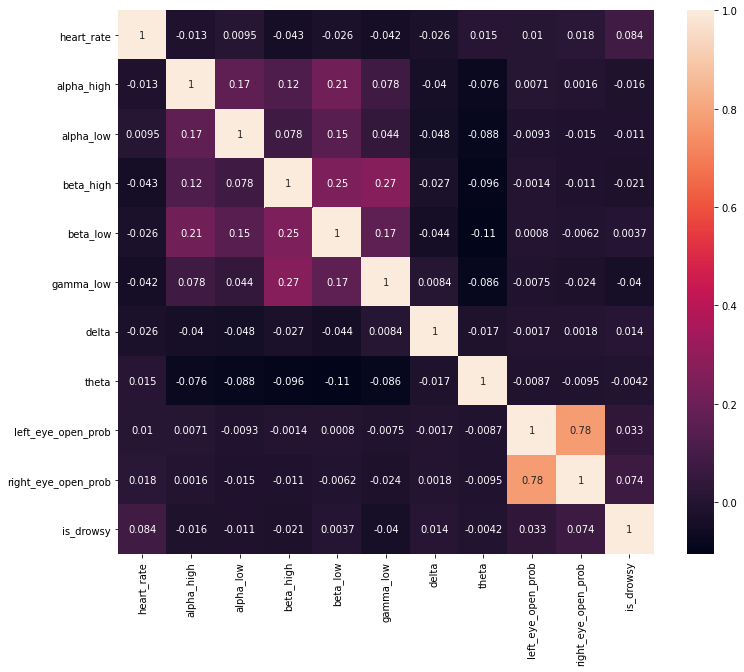




data_pascal2.csv: 



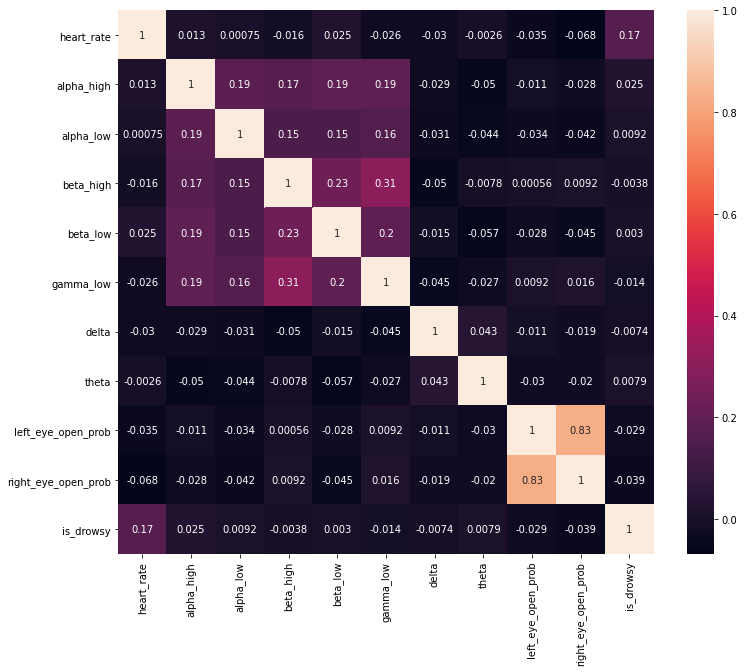




data_pascal3.csv: 



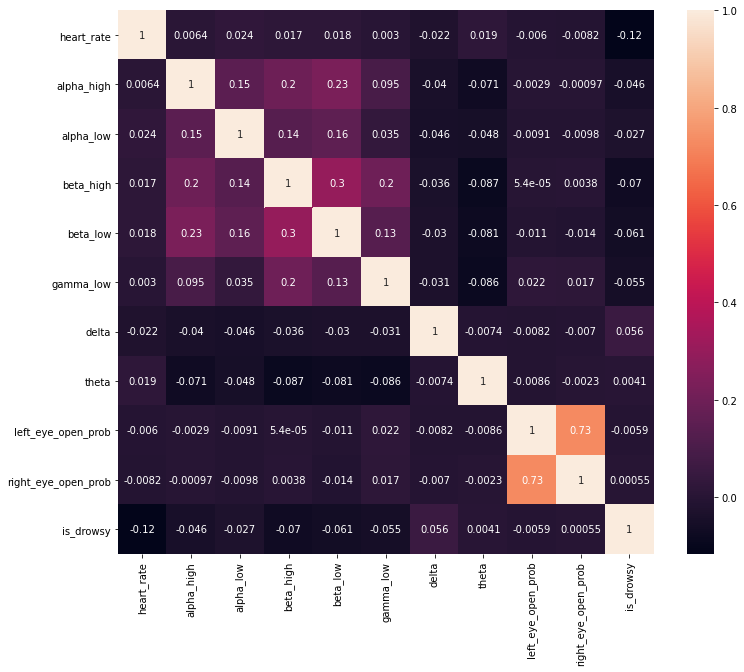




data_diah.csv: 



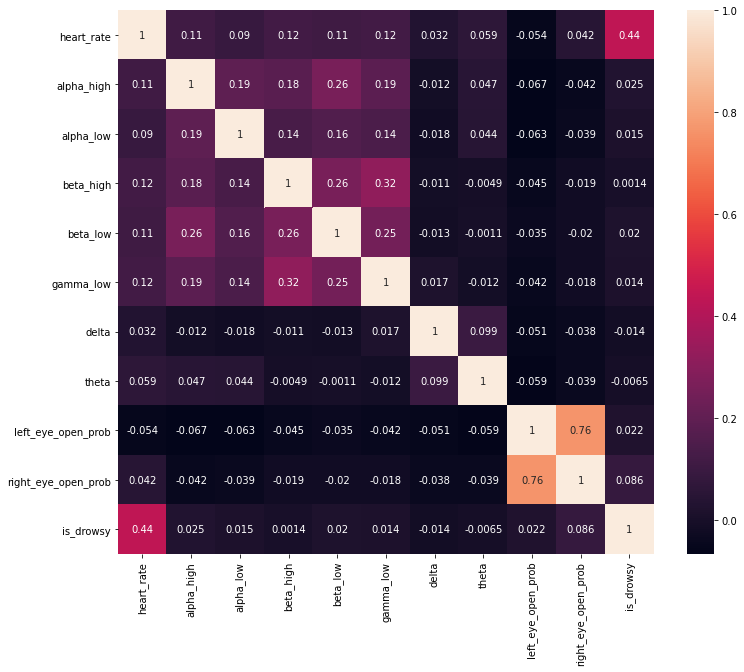




data_pascal4.csv: 



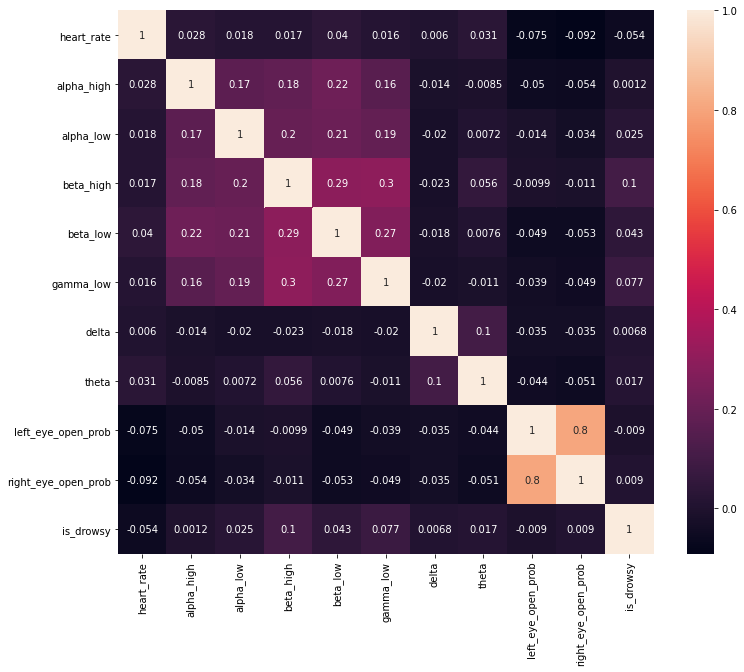




data_pascal5.csv: 



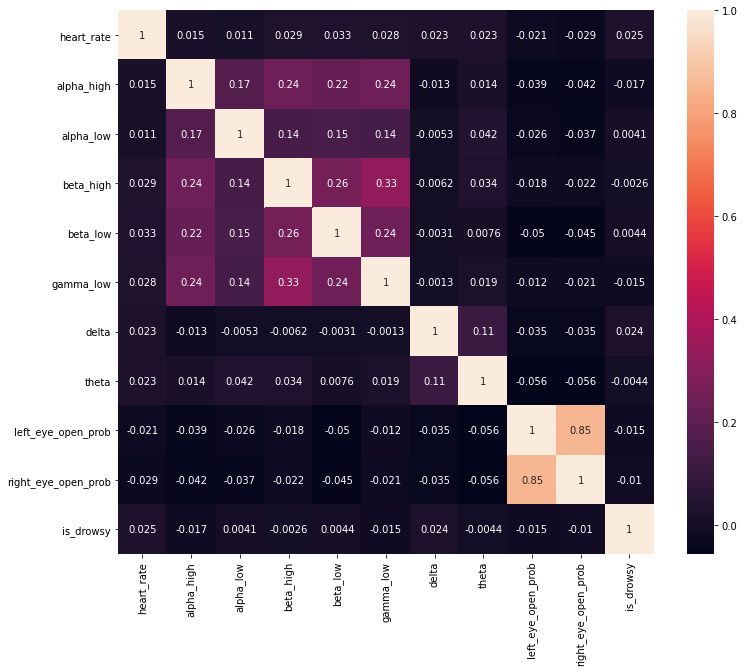




data_pascal6.csv: 



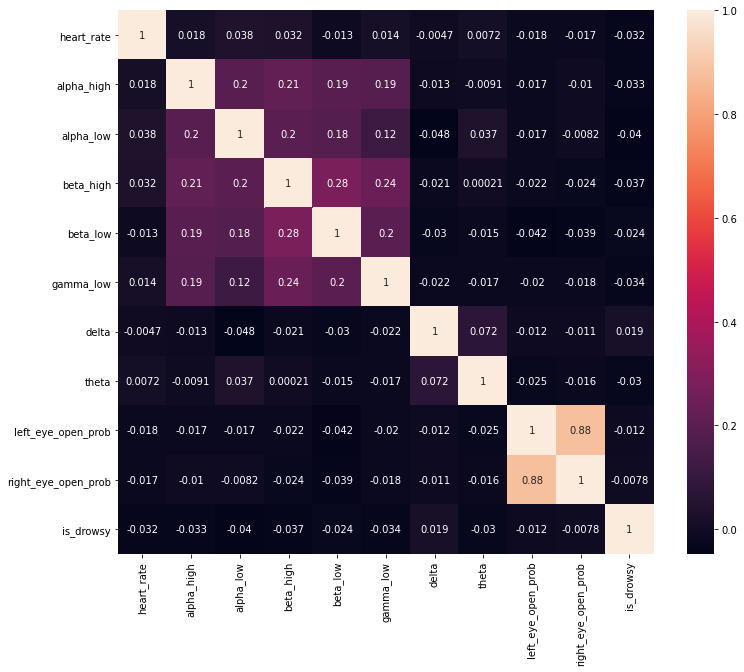

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  fig,ax=plt.subplots(figsize=(12,10))
  corr = df.corr()
  sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)
  plt.show()
  print("\n\n")

We can see that almost all have very low correlations, except in brain waves where each band has a slight correlation

<br>

###### 2.2. Heart Rate

In [ ]:
def create_timeseries_line_plot(df, feature,_ylim=None):
  # create figure and axes
  fig,ax=plt.subplots(figsize=(32,4))

  # duplicate the axes
  ax1 = ax.twinx()

  # set title
  ax.set_title(f"{feature} vs Time")

  #first axes display all the data into the line chart
  sns.lineplot(x="timestamp", y=feature, data=df, ax=ax)

  #second axes display only the drowsy data
  sns.lineplot(x="timestamp", y=feature, data=df[df["is_drowsy"]==1], ax=ax1, color="red")

  #sync the y-ticks and x-ticks between both axes
  if(_ylim!=None):
    ax.set(ylim=_ylim)
    ax1.set(ylim=_ylim)

  #set legends
  red_patch = mpatches.Patch(color='red', label='Drowsy')
  blue_patch = mpatches.Patch(color='blue', label='Alert')
  plt.legend(handles=[red_patch, blue_patch])

  plt.show()

data_yohannes.csv: 



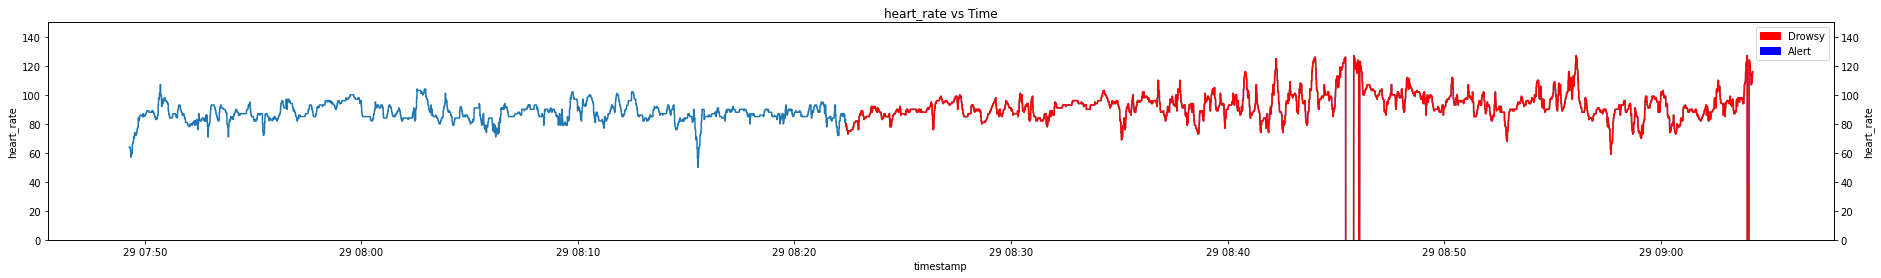




data_pascal2.csv: 



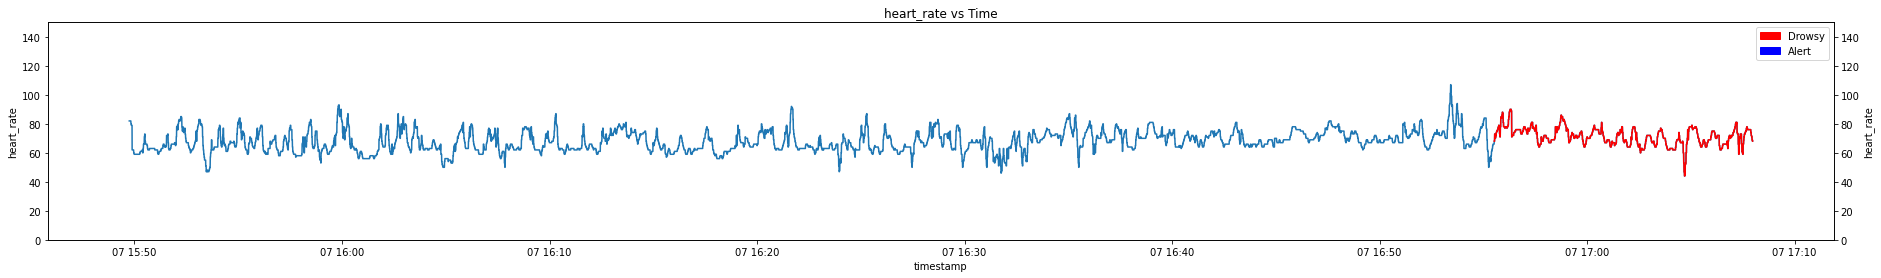




data_pascal3.csv: 



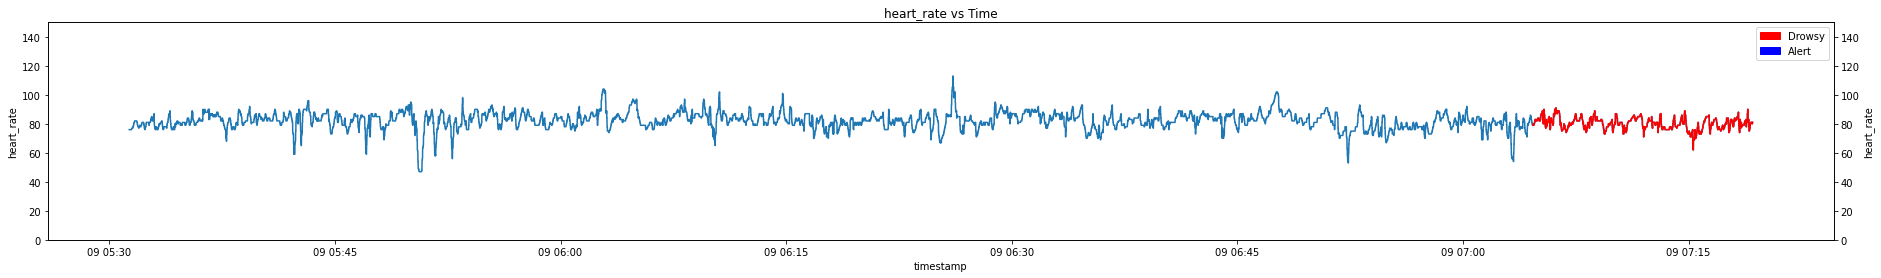




data_diah.csv: 



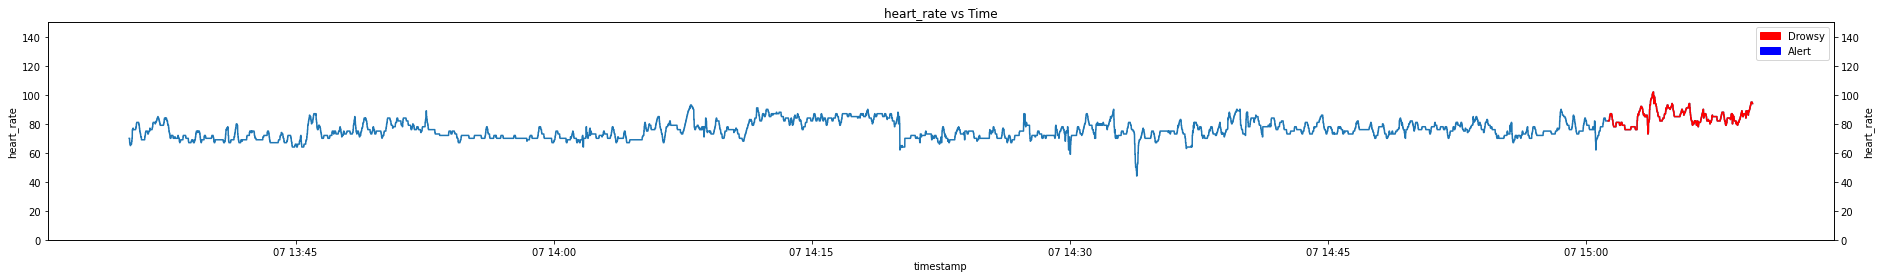




data_pascal4.csv: 



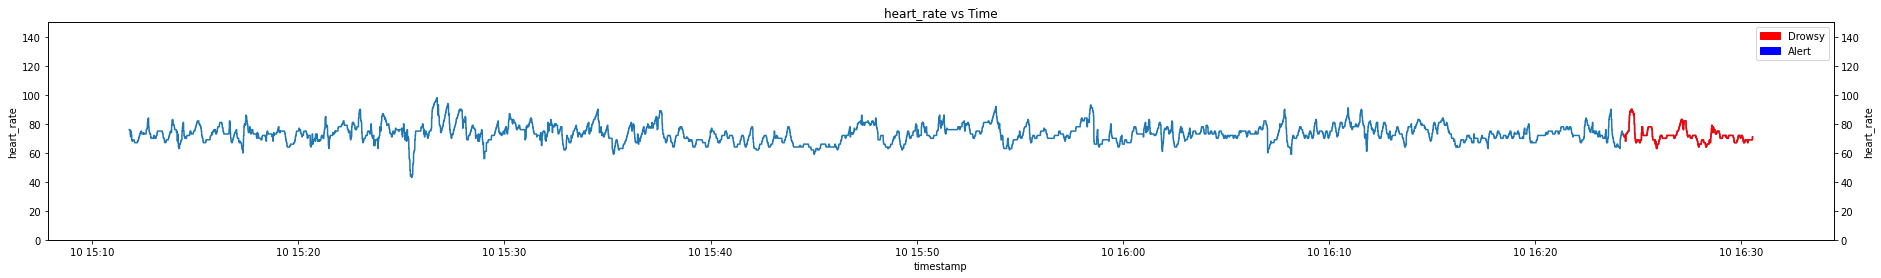




data_pascal5.csv: 



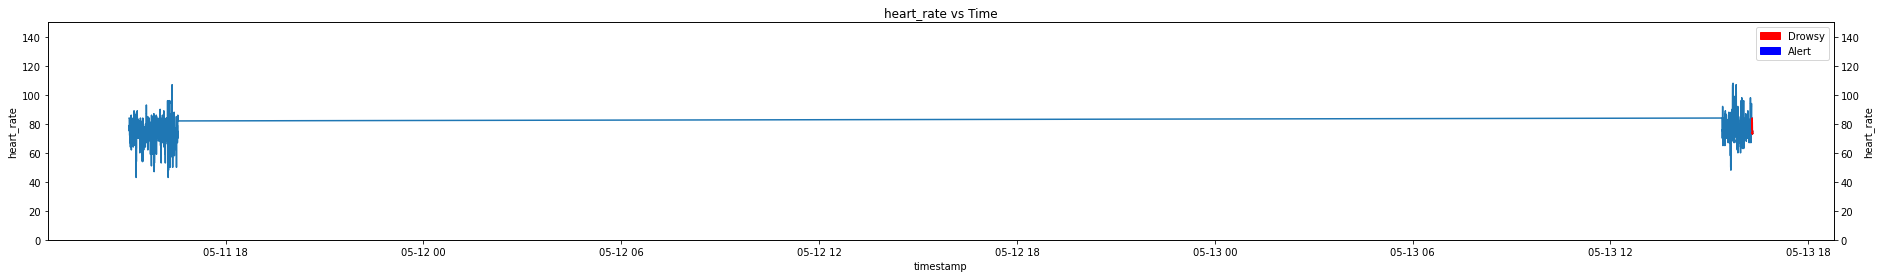




data_pascal6.csv: 



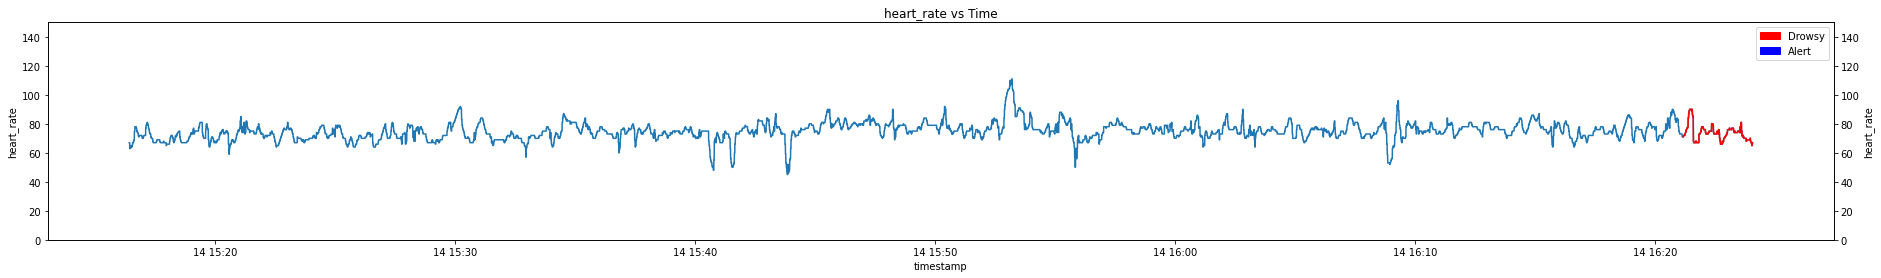

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  create_timeseries_line_plot(df,"heart_rate",(0,150))
  print("\n\n")

We can see that in the first and third data, the heart rate does not have any problem, whereas in the second data there are rows that have a heart rate value lower than 0. This does not make sense so that data having this value must be dropped.

data_yohannes.csv: 



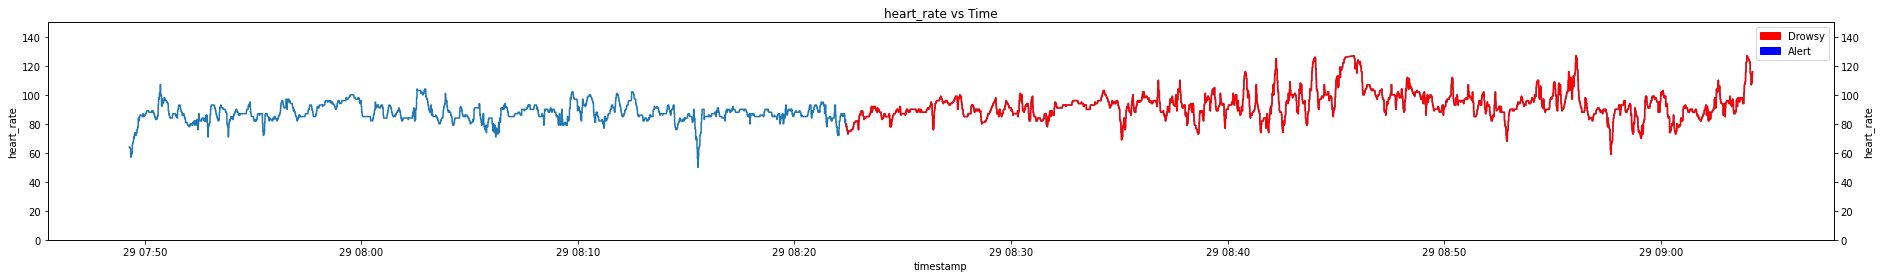




data_pascal2.csv: 



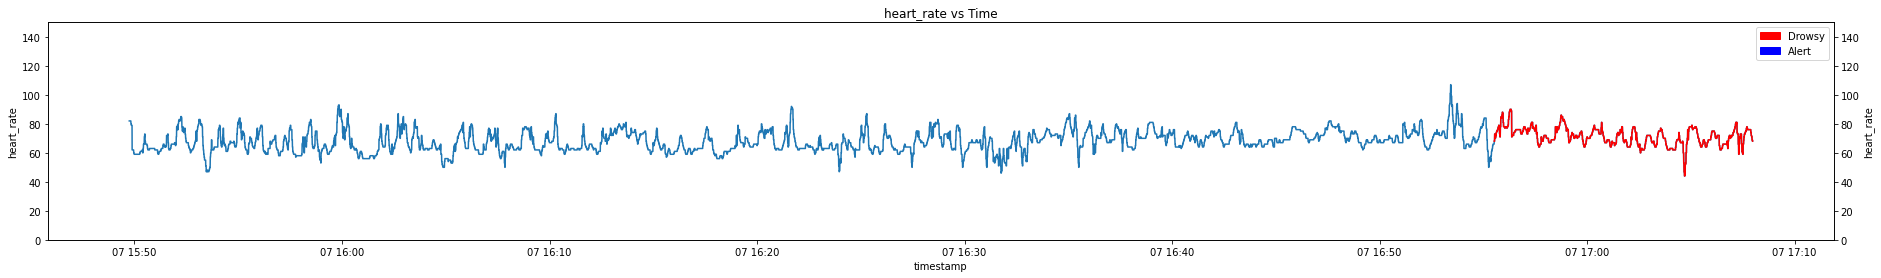




data_pascal3.csv: 



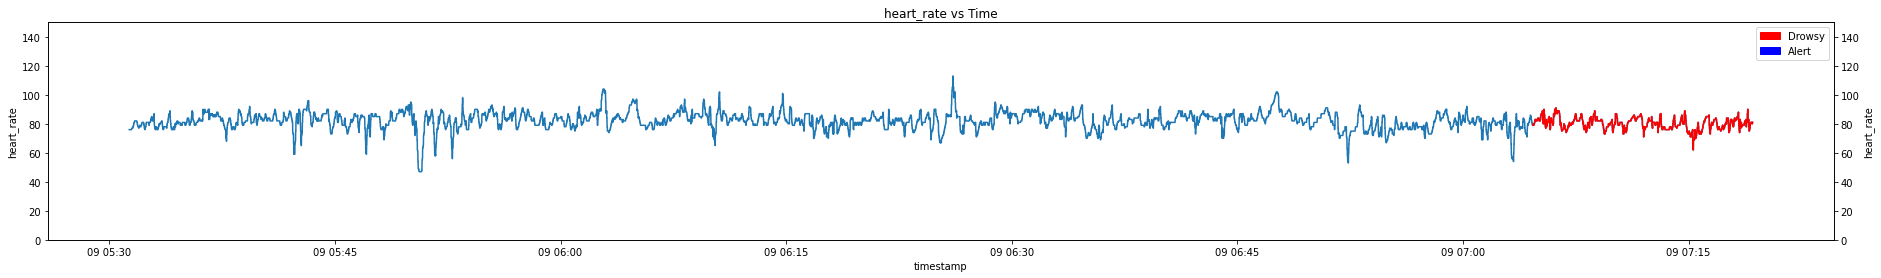




data_diah.csv: 



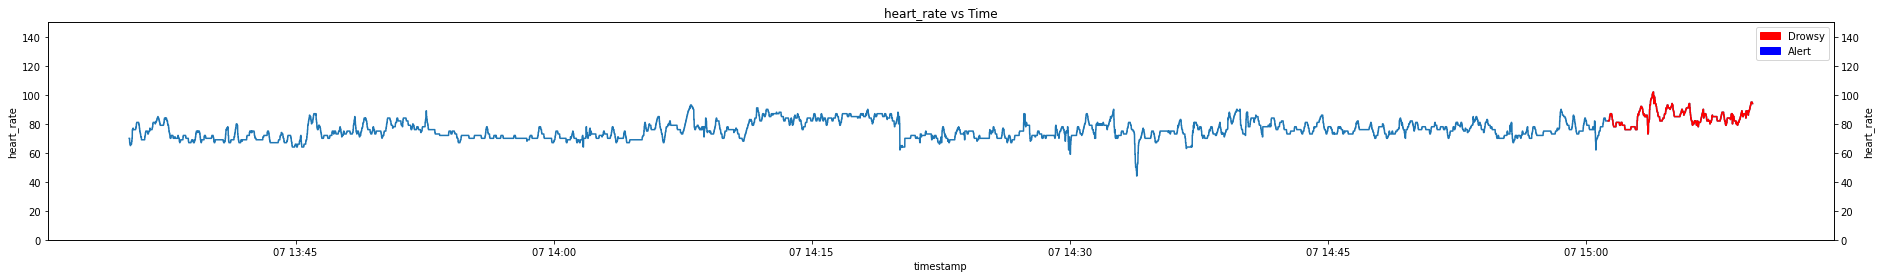




data_pascal4.csv: 



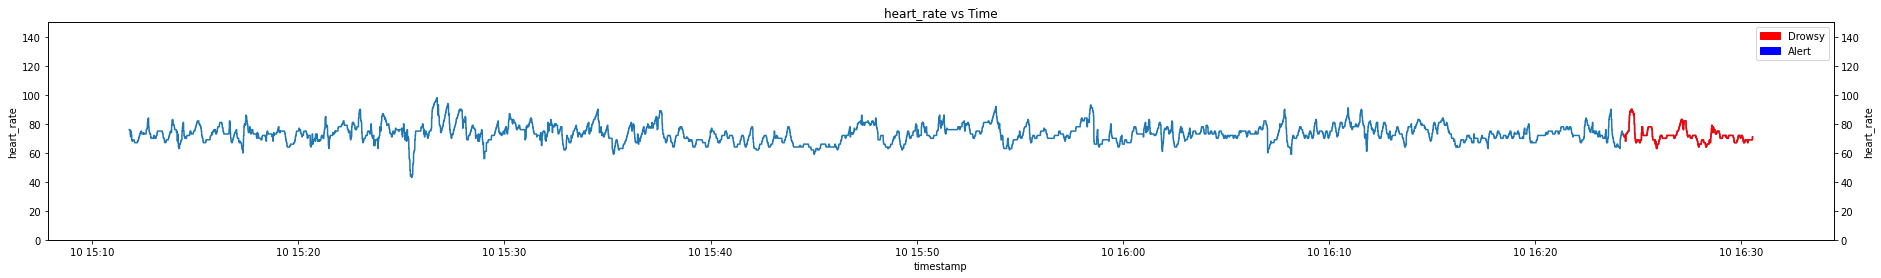




data_pascal5.csv: 



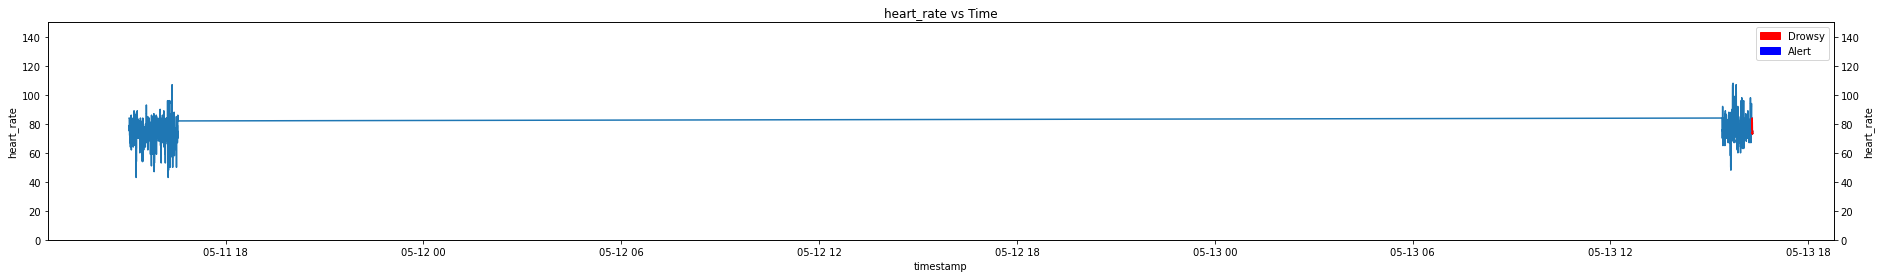




data_pascal6.csv: 



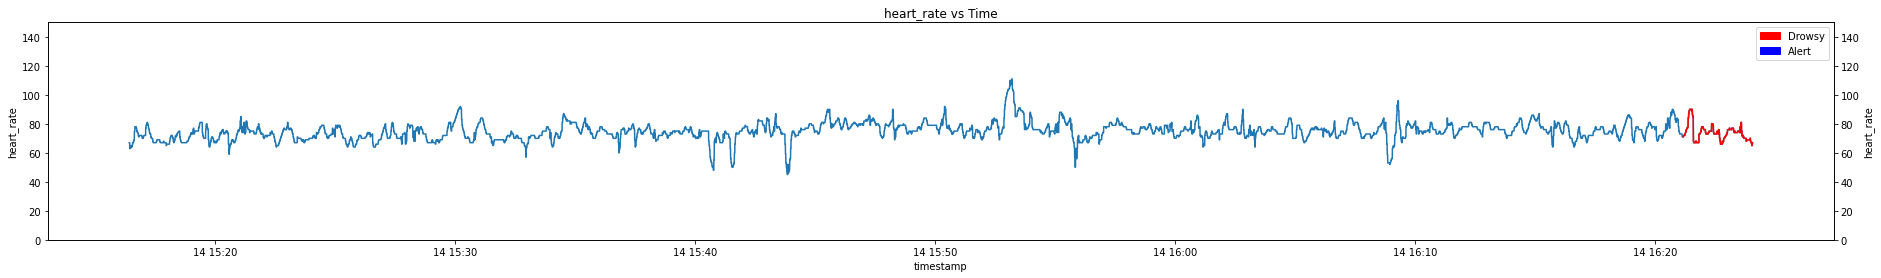

In [ ]:
def valid_heart_rate_value(df):
  df.drop(df[df["heart_rate"]<=0].index,inplace=True)
  return df

for filename, df in df_list.items():
  valid_heart_rate_value(df)

for filename, df in df_list.items():
  print(filename+": \n")
  create_timeseries_line_plot(df,"heart_rate",(0,150))
  print("\n\n")

We can see now that the heart rate value makes more sense because there are no values that far different from the others.

<br>

From the visualization above, it can be seen that in the second data which is the data that I took from my friend, the heart rate value is far more volatile than the data one and three. I think this is because of the different heart rate characteristics of different people

According to research conducted, when in drowsy condition, human heart rate tends to be slower compared when not sleepy. But, from the visualization above it's hard to say that the heart rate decreases in drowsy condition

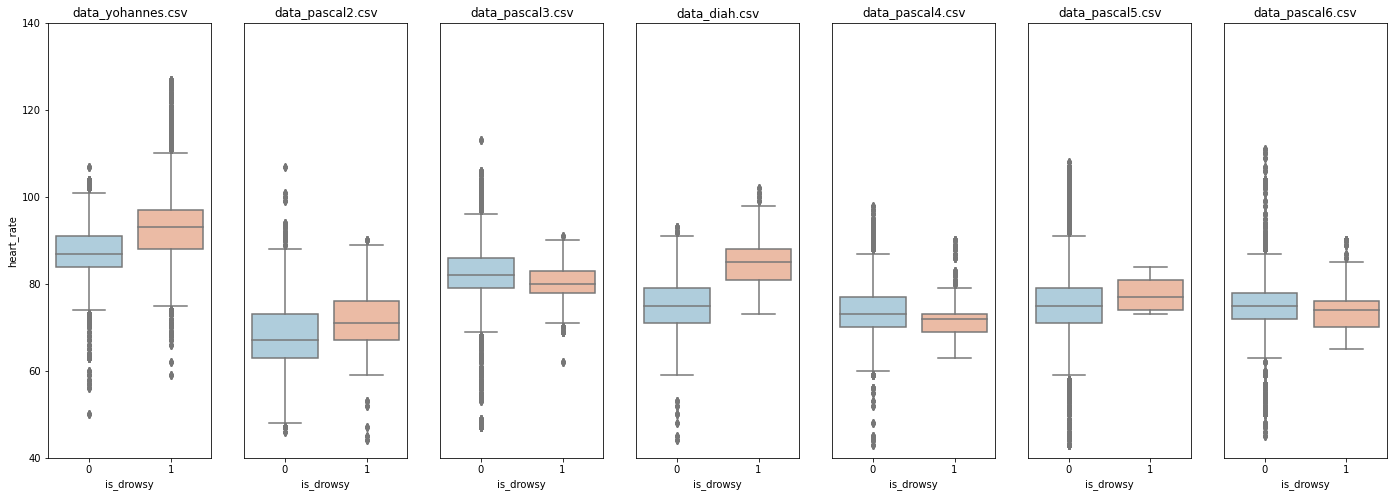

In [ ]:
def create_box_plot(df_list,feature,separate_by_is_drowsy=True,_ylim=None):
  dfs = [key for key in df_list]
  fig, axes = plt.subplots(nrows=1, ncols=len(df_list), figsize=(24,8))
  for idx,ax in enumerate(axes):
    ax.set_title(dfs[idx])
    if (idx!=0):
      ax.set_ylabel("")
      ax.get_yaxis().set_visible(False)
    if(separate_by_is_drowsy):
      sns.boxplot(x="is_drowsy", y=feature,data=df_list[dfs[idx]],ax=ax,palette="RdBu_r")
    else:
      sns.boxplot(y=feature,data=df_list[dfs[idx]],ax=ax)
    if(_ylim!=None):
      ax.set(ylim=_ylim)

create_box_plot(df_list,"heart_rate",True,(40, 140))

Even after using the boxplot, higher heart rate can only be seen in the third data, whereas in the first and second data, when in drowsy condition it is showing relatively higher data distribution of heart rate data

<br>

##### 2.3. Brain Waves

There are 7 types of brain waves that can be recorded by the device used, which is:
* Alpha high
* Alpha Low
* Beta High
* Beta Low
* Gamma Low
* Delta
* Theta

If we follow the results of research that has been done, driver in a drowsy condition will be marked by the strengthening of the delta and theta waves while the alpha wave will the weakening

We will see if any of that research is true or maybe we can find another insights from the data which can help during the model building

In [ ]:
def draw_brainwaves(df, _ylim=None):
  # initiate canvas
  fig, ax = plt.subplots(figsize=(24,8))

  # create axes for each brain wave band
  ax1 = ax.twinx()
  ax2 = ax.twinx()
  ax3 = ax.twinx()
  ax4 = ax.twinx()
  ax5 = ax.twinx()
  ax6 = ax.twinx()

  # draw the chart
  sns.lineplot(x="timestamp", y="alpha_high", data=df, ax=ax, color = sns.xkcd_rgb["windows blue"])
  sns.lineplot(x="timestamp", y="alpha_low", data=df, ax=ax1, color = sns.xkcd_rgb["amber"])
  sns.lineplot(x="timestamp", y="beta_high", data=df, ax=ax2, color = sns.xkcd_rgb["greyish"])
  sns.lineplot(x="timestamp", y="beta_low", data=df, ax=ax3, color = sns.xkcd_rgb["faded green"])
  sns.lineplot(x="timestamp", y="gamma_low", data=df, ax=ax4, color = sns.xkcd_rgb["dusty purple"] )
  sns.lineplot(x="timestamp", y="delta", data=df, ax=ax5, color = sns.xkcd_rgb["pale red"])
  sns.lineplot(x="timestamp", y="theta", data=df, ax=ax6, color = sns.xkcd_rgb["teal"])

  # remove ylabel and yticks
  ax.set_ylabel("")
  ax1.set_ylabel("")
  ax2.set_ylabel("")
  ax2.get_yaxis().set_visible(False)
  ax3.set_ylabel("")
  ax3.get_yaxis().set_visible(False)
  ax4.set_ylabel("")
  ax4.get_yaxis().set_visible(False)
  ax5.set_ylabel("")
  ax5.get_yaxis().set_visible(False)
  ax6.set_ylabel("")
  ax6.get_yaxis().set_visible(False)

  # /set yticks value
  if(_ylim!=None):
    ax.set(ylim=_ylim)
    ax1.set(ylim=_ylim)

  # legend
  windows_blue_patch = mpatches.Patch(color=sns.xkcd_rgb["windows blue"], label='Alpha High')
  amber_patch = mpatches.Patch(color=sns.xkcd_rgb["amber"], label='Alpha Low')
  greyish_patch = mpatches.Patch(color=sns.xkcd_rgb["greyish"], label='Beta High')
  faded_green_patch = mpatches.Patch(color=sns.xkcd_rgb["faded green"], label='Beta Low')
  dusty_purple_patch = mpatches.Patch(color=sns.xkcd_rgb["dusty purple"], label='Gamma Low')
  pale_red_patch = mpatches.Patch(color=sns.xkcd_rgb["pale red"], label='Delta')
  teal_patch = mpatches.Patch(color=sns.xkcd_rgb["teal"], label='Theta')
  plt.legend(handles=[windows_blue_patch, amber_patch, greyish_patch, faded_green_patch,dusty_purple_patch, pale_red_patch,teal_patch])

  plt.show()

data_yohannes.csv: 



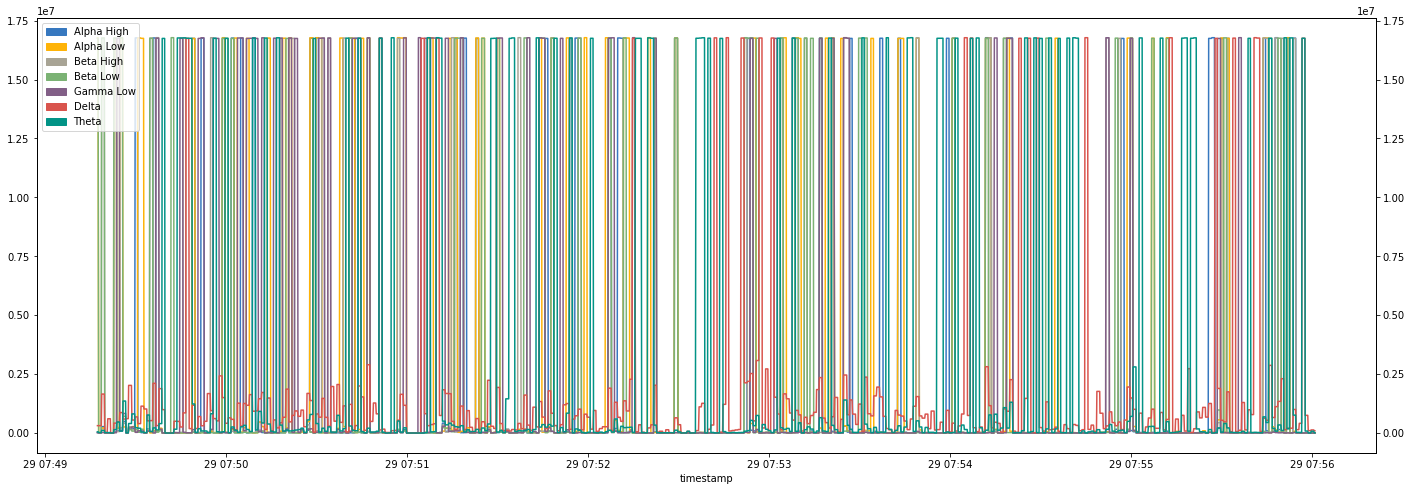




data_pascal2.csv: 



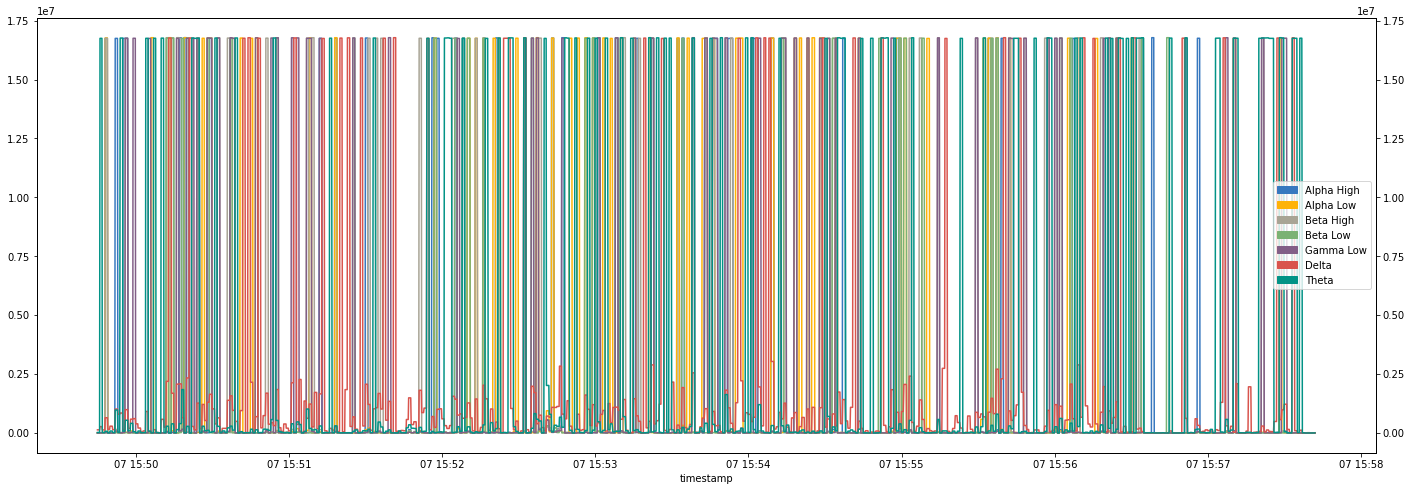




data_pascal3.csv: 



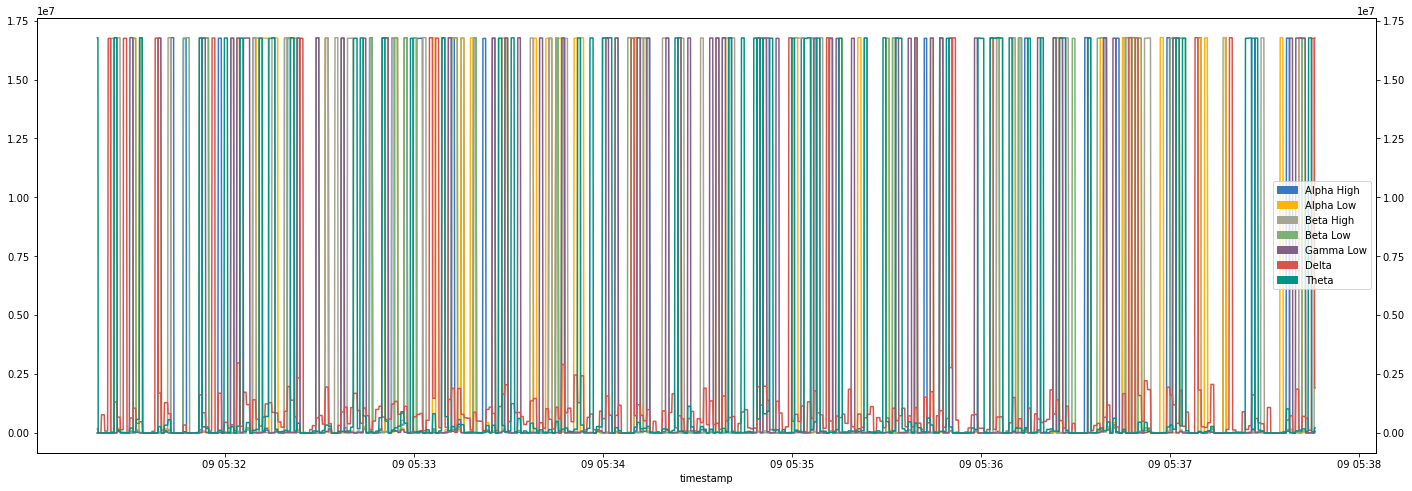




data_diah.csv: 



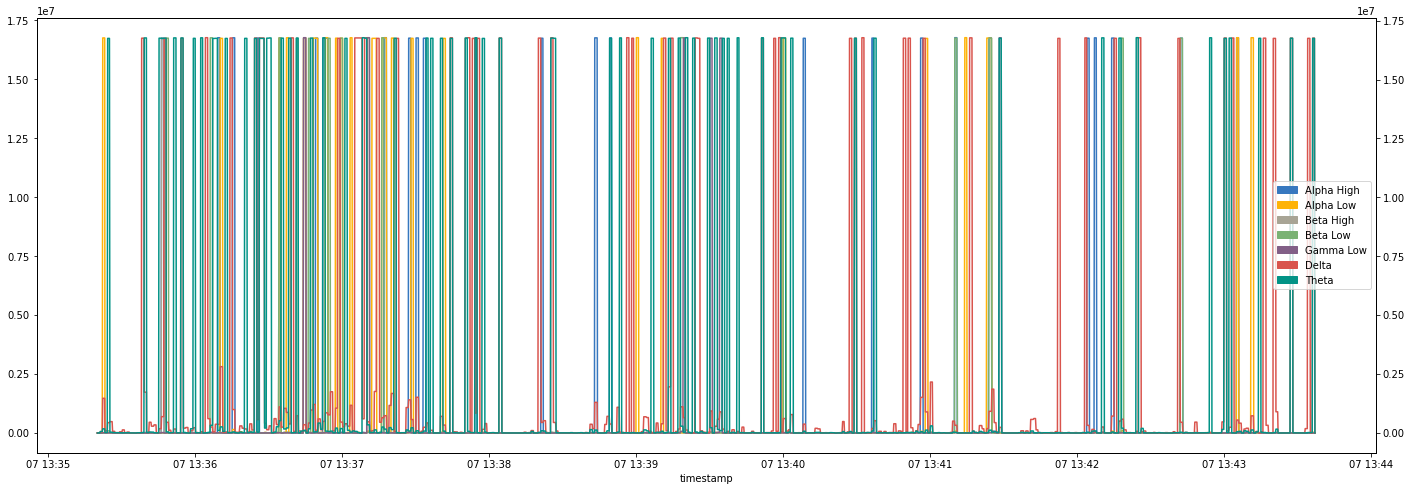




data_pascal4.csv: 



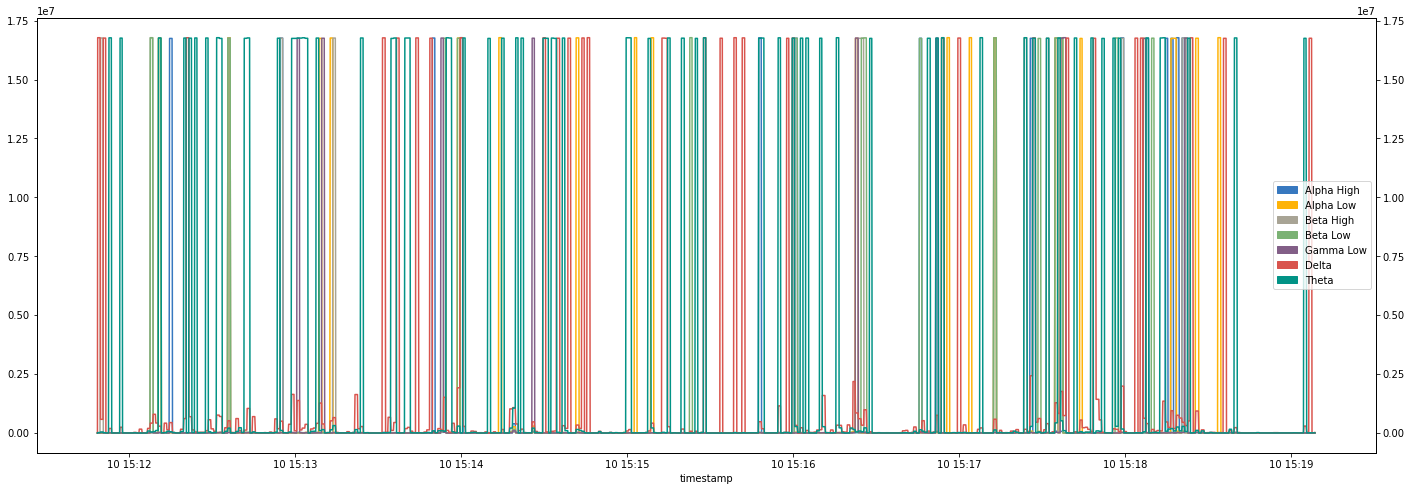




data_pascal5.csv: 



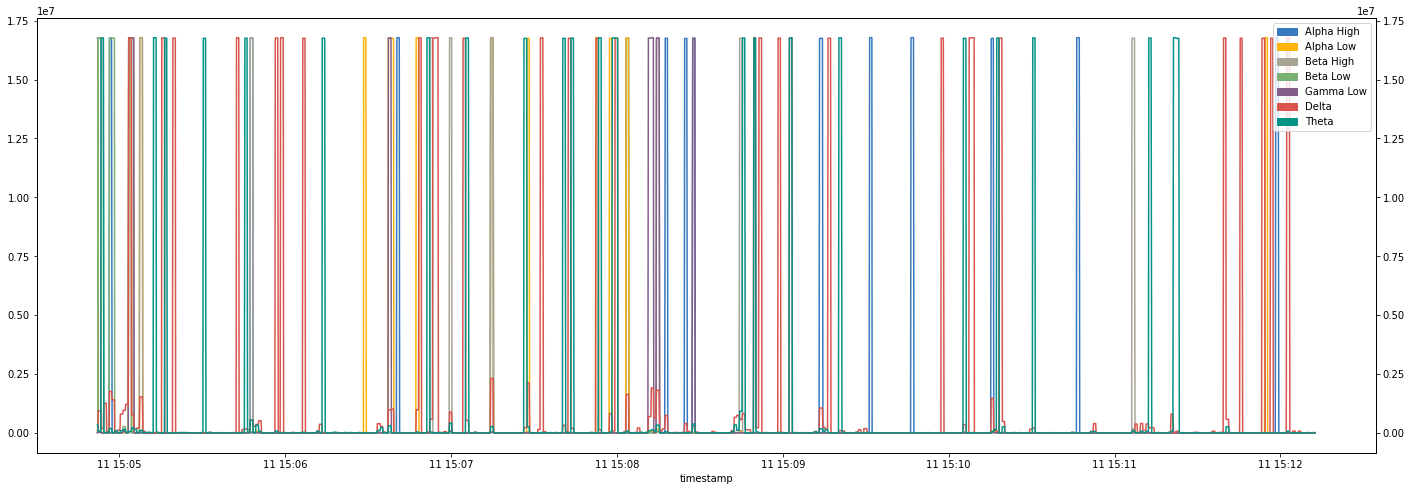




data_pascal6.csv: 



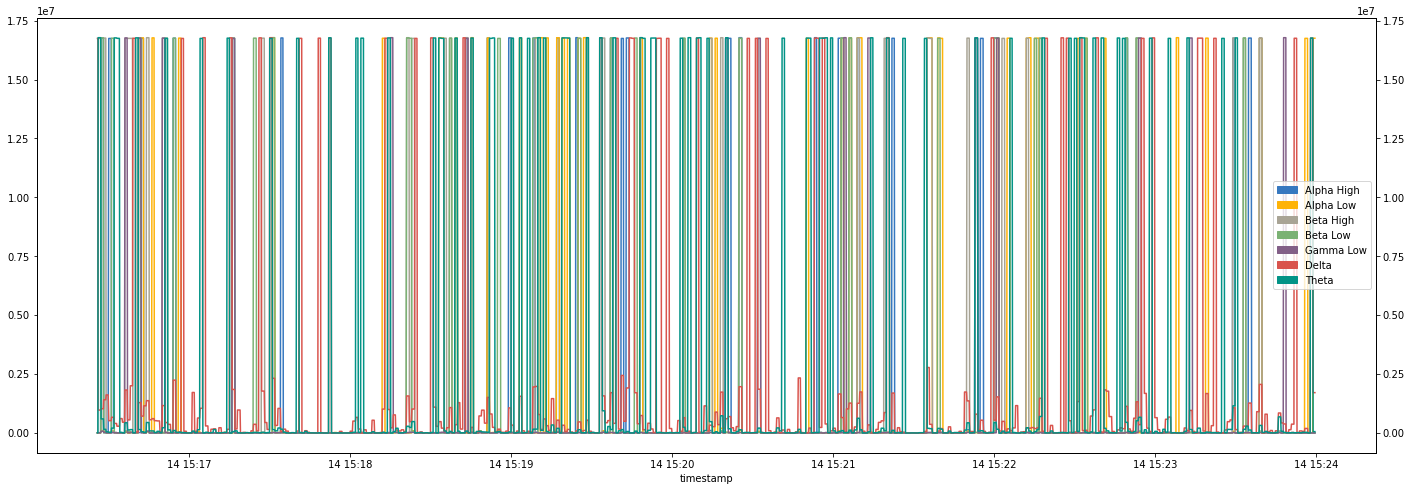

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  draw_brainwaves(df.head(3000))
  print("\n\n")

It is very clear that the chart above cannot be read easily. After I examine it deeper, the data recorded some value that exceeds 16,000,000 which makes no sense and make the distance between the data is very far between one and each other. This not only appear in the alpha high waves, but also all the other waves

For that reason, rows which has this value will be eliminated and see if the graph becomes more readable.

In [ ]:
def valid_brainwaves_value(df):
  df.drop(df[df["alpha_high"]>=16000000.0].index,inplace=True)
  df.drop(df[df["alpha_high"]<=0].index,inplace=True)
  df.drop(df[df["theta"]>=16000000.0].index,inplace=True)
  df.drop(df[df["theta"]<=0].index,inplace=True)

In [ ]:
for filename, df in df_list.items():
  # print(filename+": \n")
  valid_brainwaves_value(df)
  # # draw_brainwaves(df.head(3000))
  # print("\n\n")

we can see the correlation between the wave band, but it is still difficult to see the graph above, so it helps us see one by one for each wave band

###### 2.2.1 Alpha High Waves

From the [documentation](https://http://support.neurosky.com/kb/science/eeg-band-frequencies) it says that alpha high waves is can obtained with the device when the raw data scaled down to 10-12 Hz

In [ ]:
df_list = [df, df2, df3, df4, df5, df6]

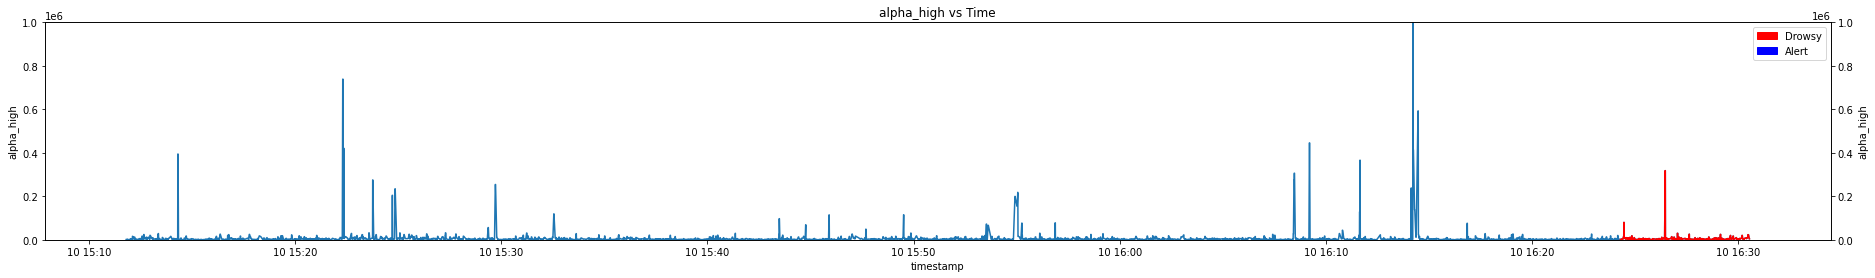

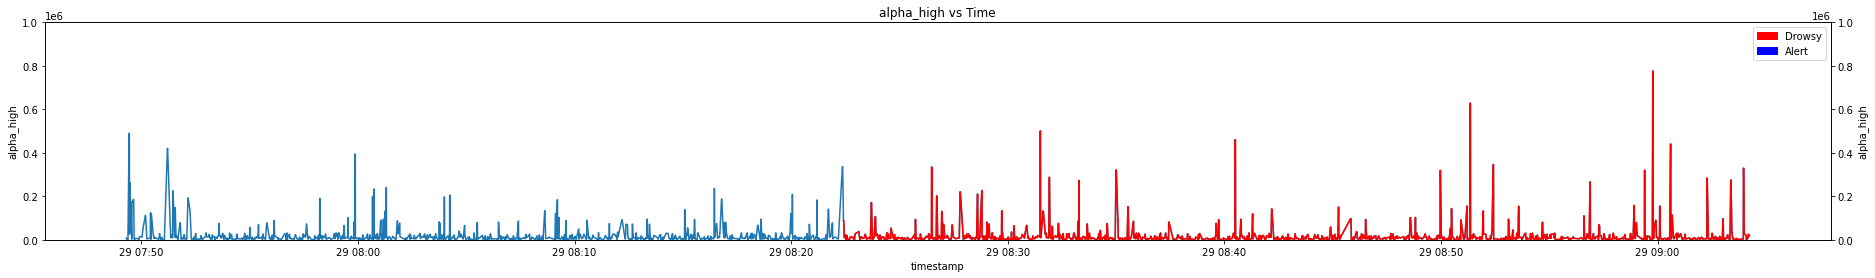

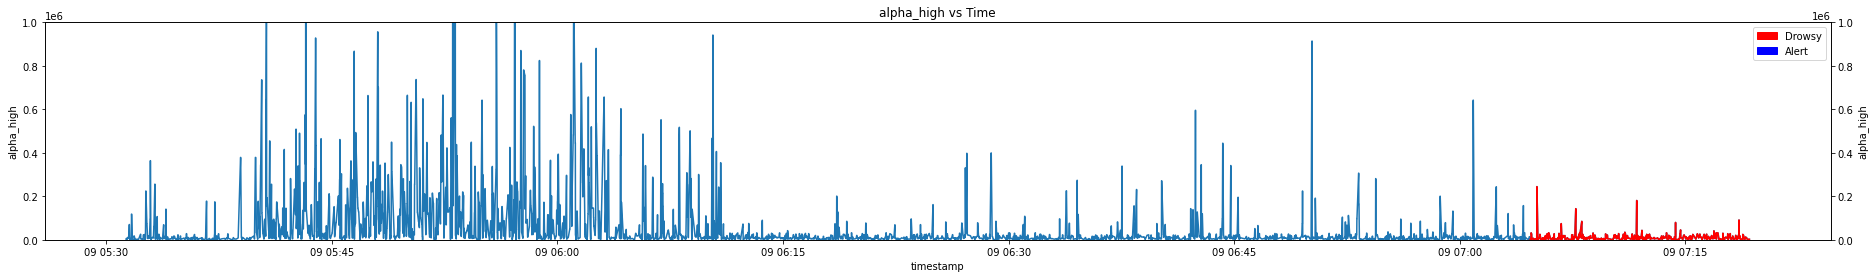

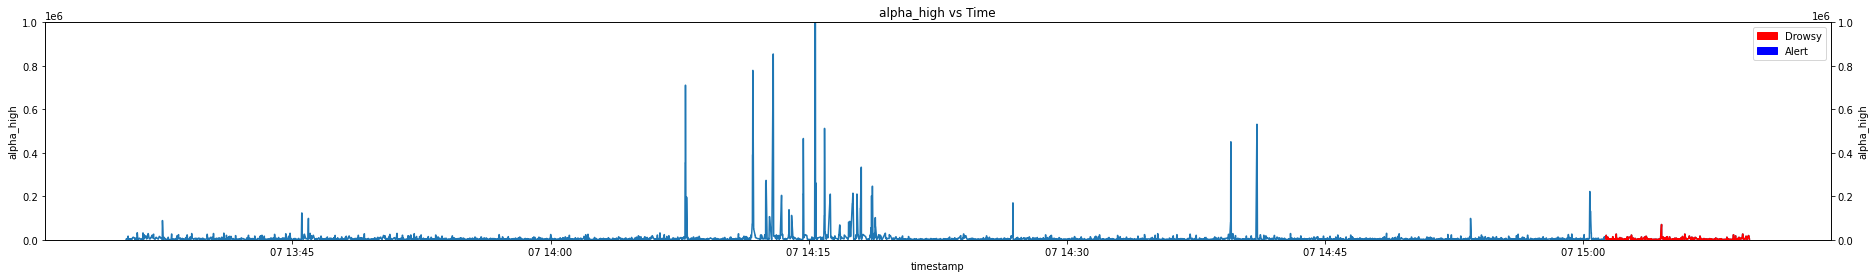

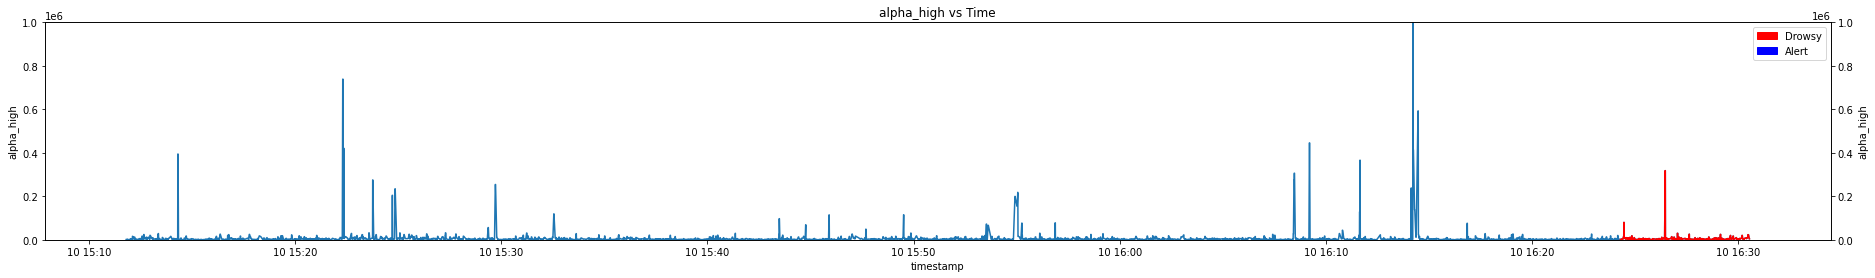

In [ ]:
for df in df_list:
  create_timeseries_line_plot(df,"alpha_high",(0,1000000))

Now the graph is seen much more understandable than before. Besides that, we can also see that there are special patterns in these brain waves.

But with the naked eye I personally have difficulty finding differences in the form of graphics when the driver is in a drowsy condition or not

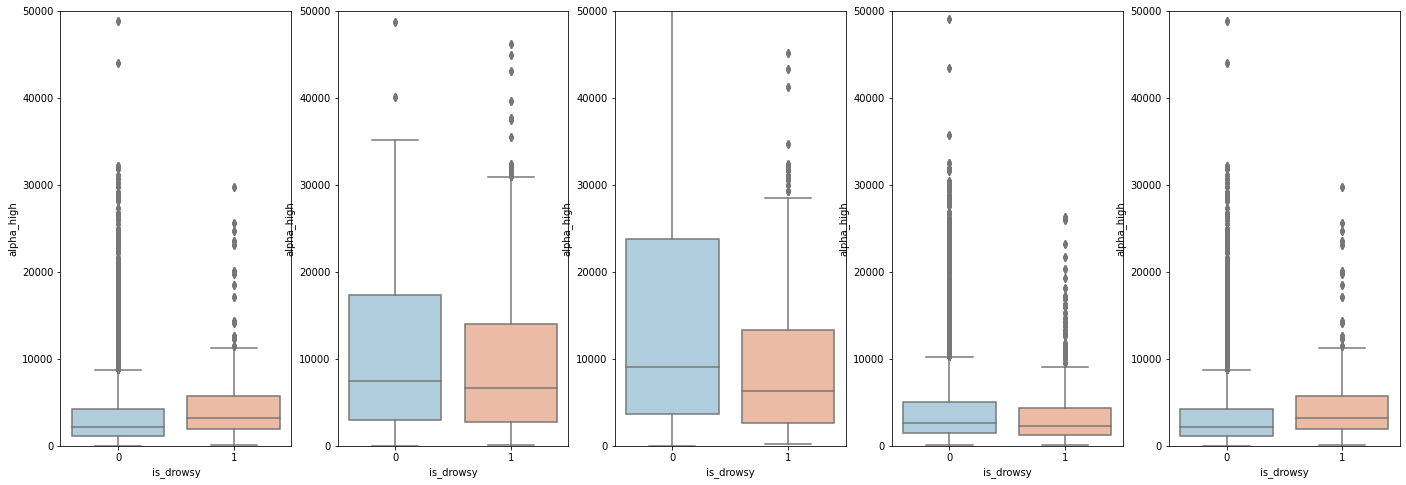

In [ ]:
create_box_plot(df_list,"alpha_high",True,(0,50000))

When looking at the boxplot, there is actually a tendency for this wave to have weaker data variations when the driver is in drowsy condition.

This can be directly seen in data 2 and 3. Whereas in data 4, although the range is greater when driver is in drowsy condition, the median of this data is slightly lower which indicates that the data are mostly at lower values. However, data 1 shows that when driver is in drowsy condition, this wave tends to be stronger but not much



<br>

###### 2.2.2 Alpha Low Waves

This wave is at 8-9Hz

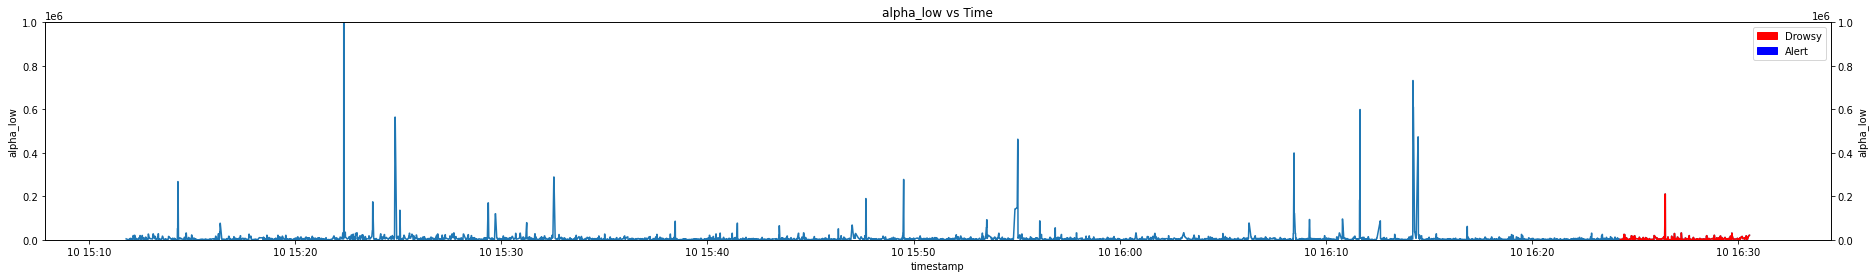

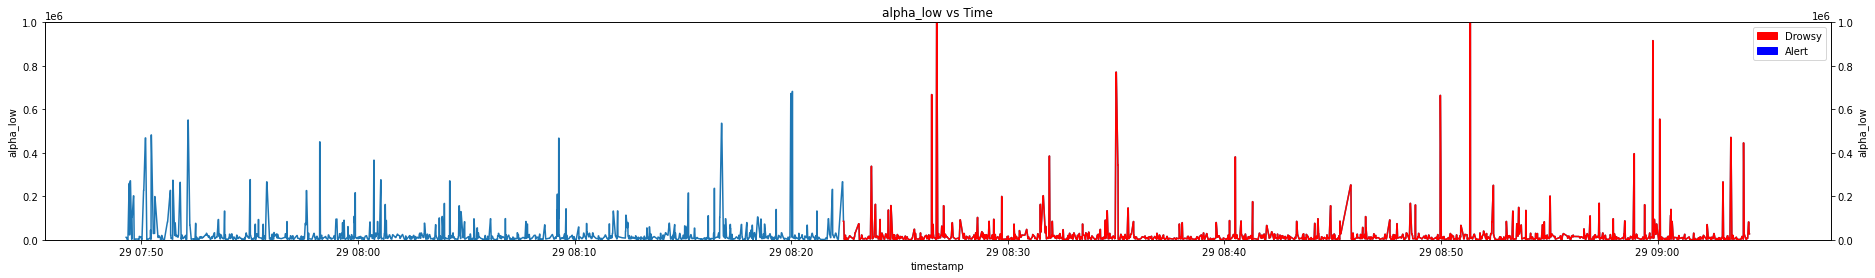

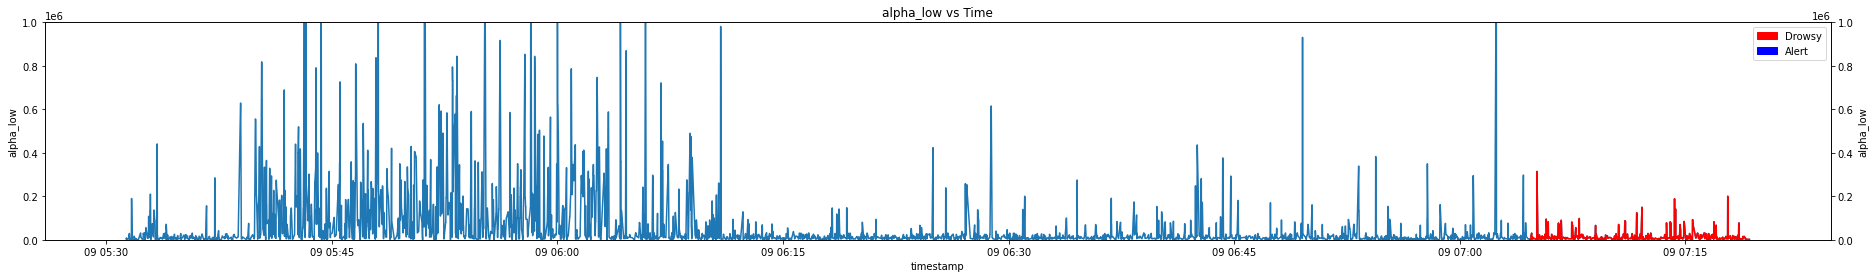

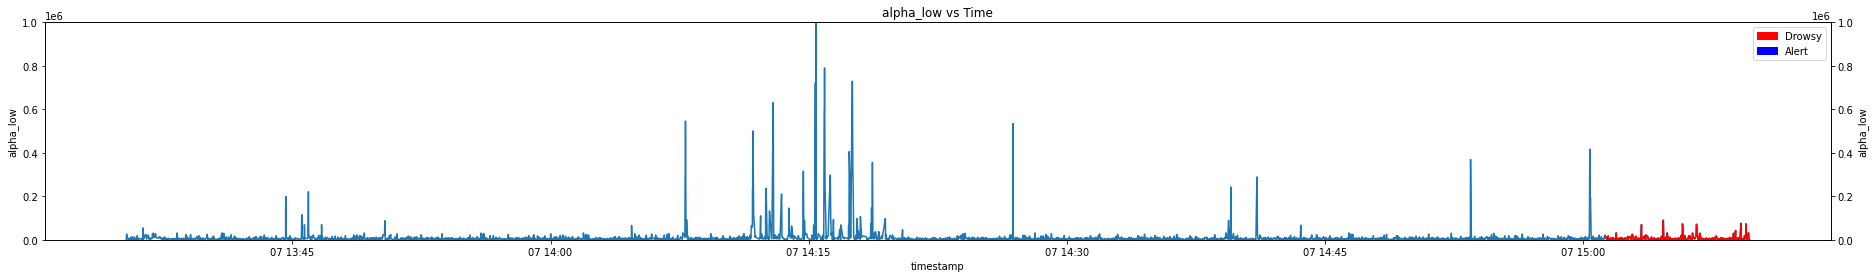

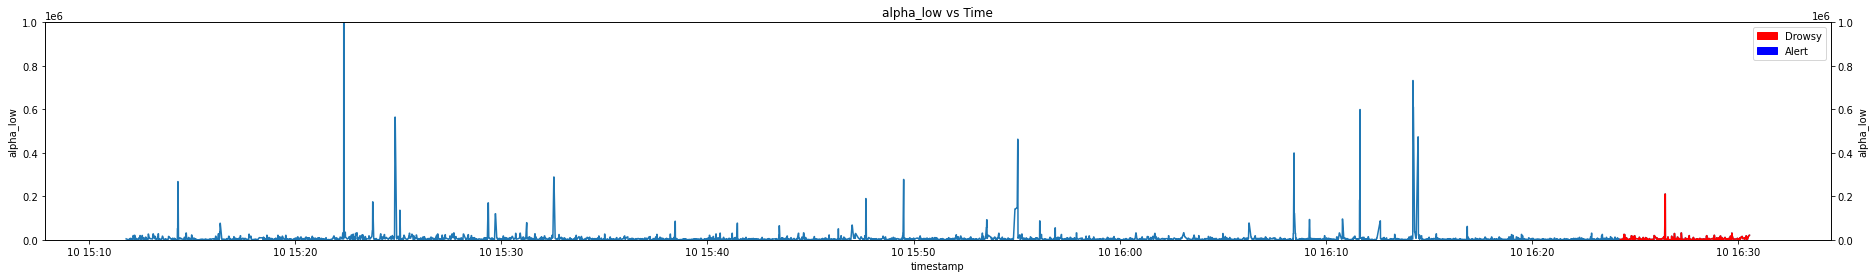

In [ ]:
alpha_low_ylim = (0,1000000)

for df in df_list:
  create_timeseries_line_plot(df,"alpha_low",alpha_low_ylim)

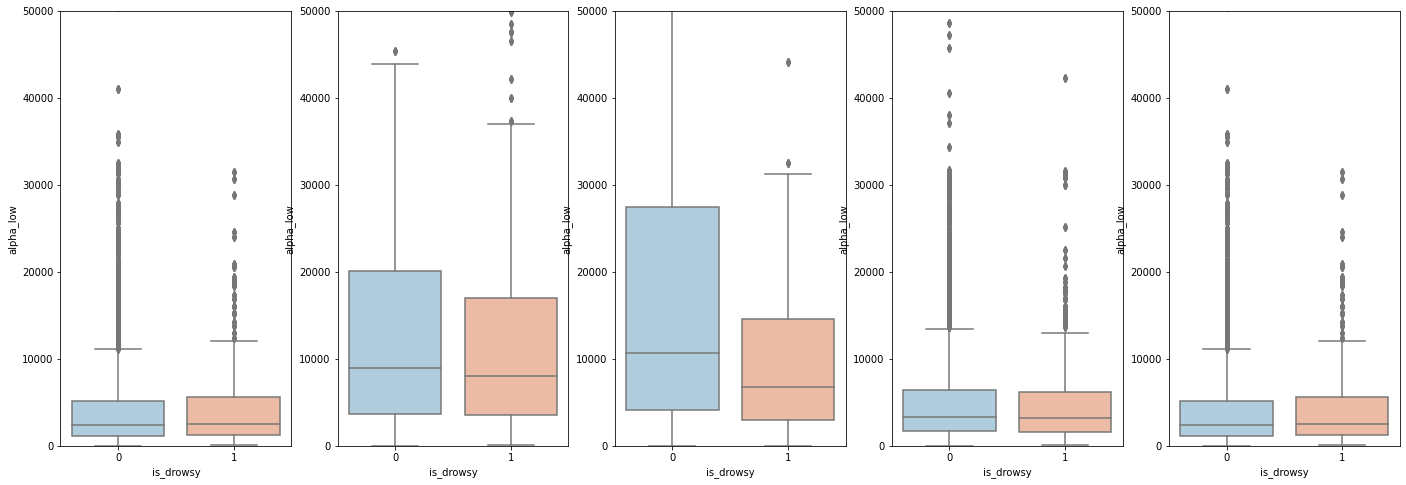

In [ ]:
create_box_plot(df_list,"alpha_low",True,(0,50000))

If we look at the results of visualization with the two types of graphs above, we can actually see that the data generated is very similar between alpha high waves and alpha low waves

<br>

###### 2.2.3 Beta High Waves

This wave is at 18-30Hz

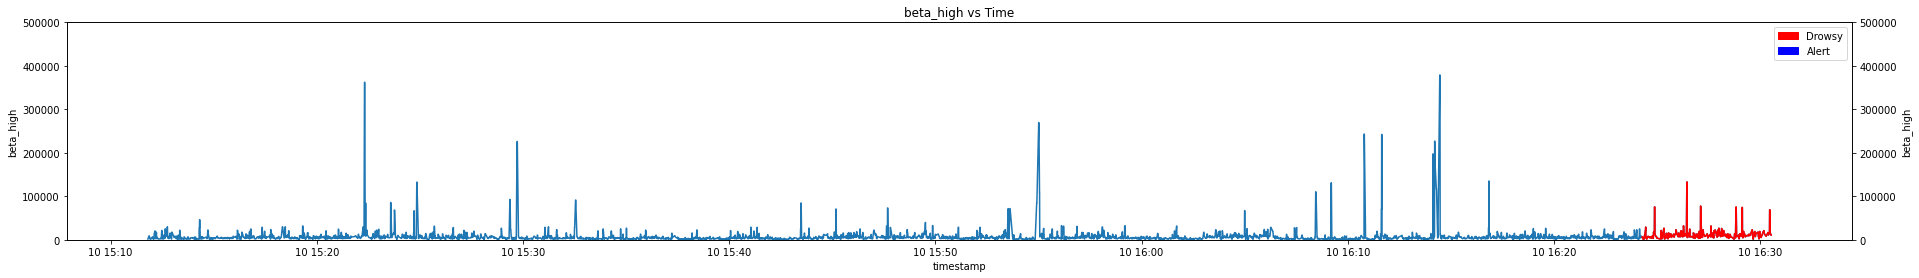

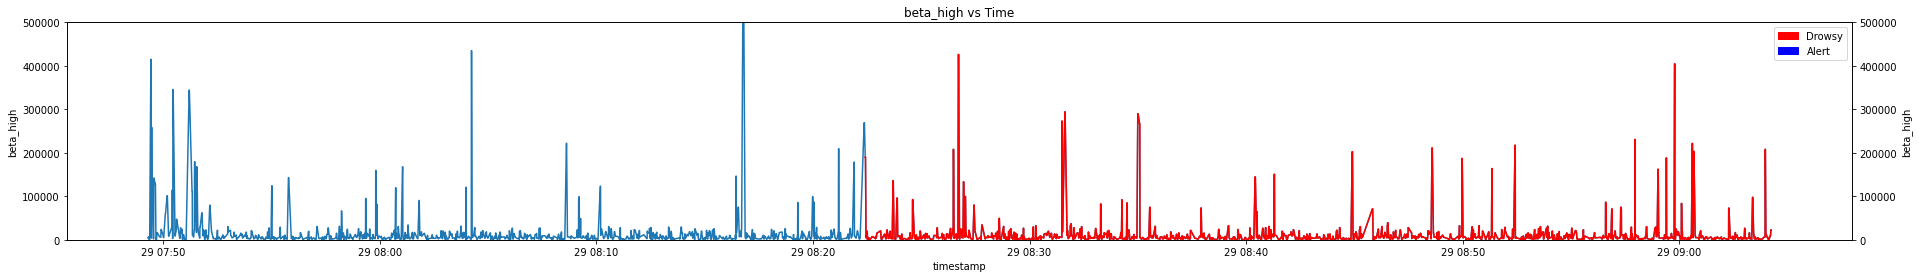

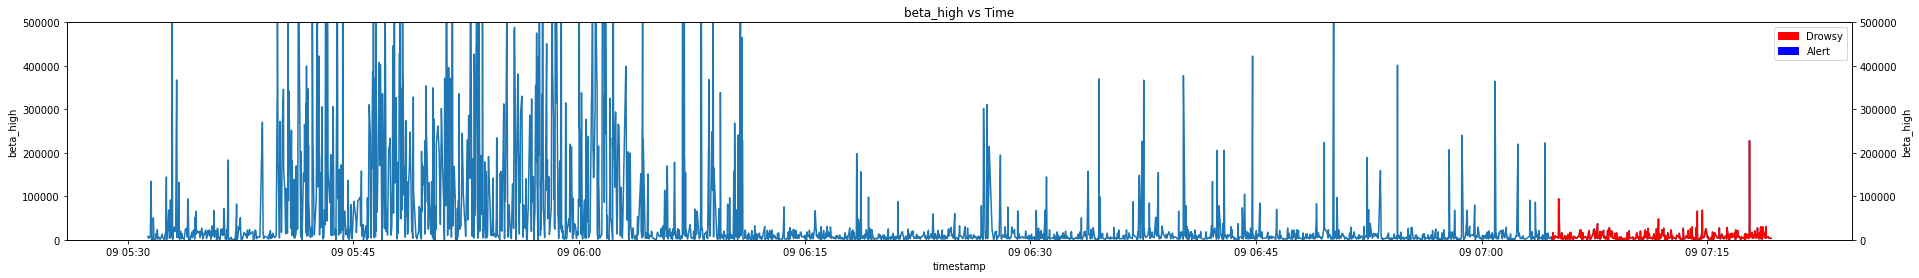

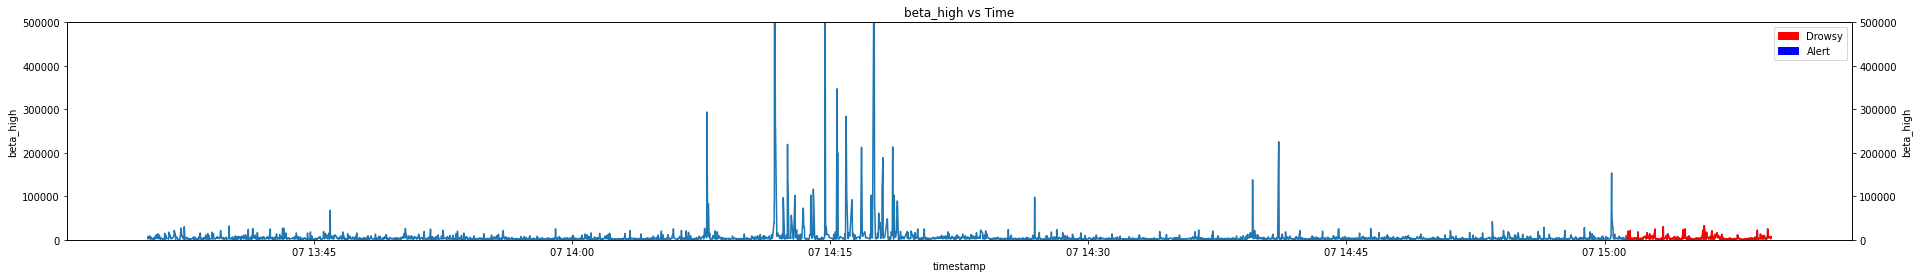

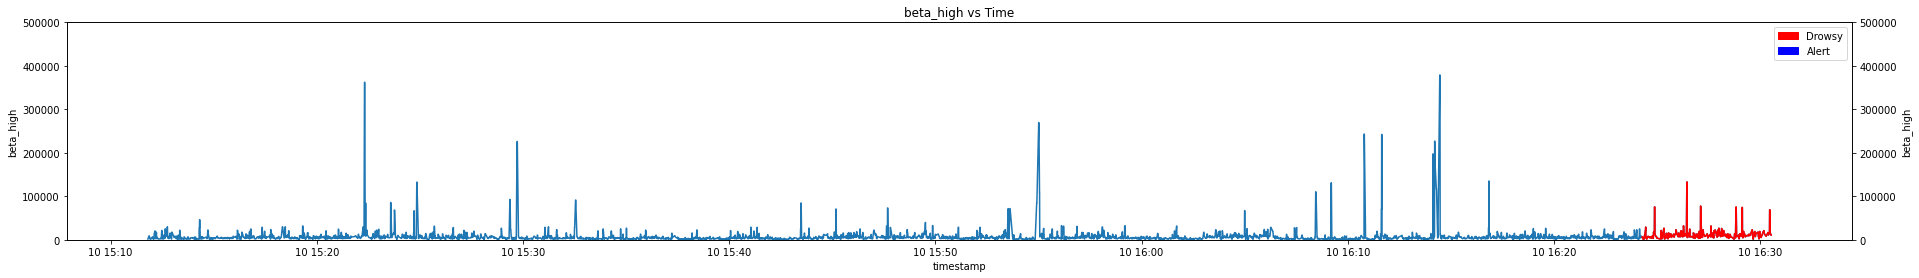

In [ ]:
beta_high_ylim = (0,500000)

for df in df_list:
  create_timeseries_line_plot(df,"beta_high",beta_high_ylim)

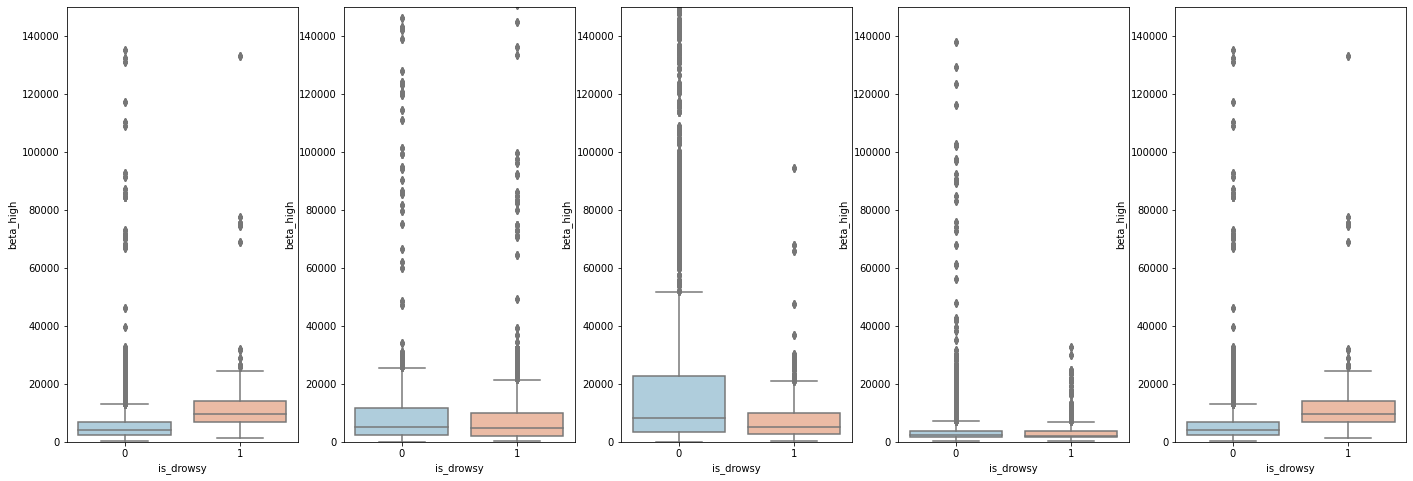

In [ ]:
create_box_plot(df_list,"beta_high",True,(0,150000))

<br>

###### 2.2.4 Beta Low Waves

This wave is at 13-17Hz

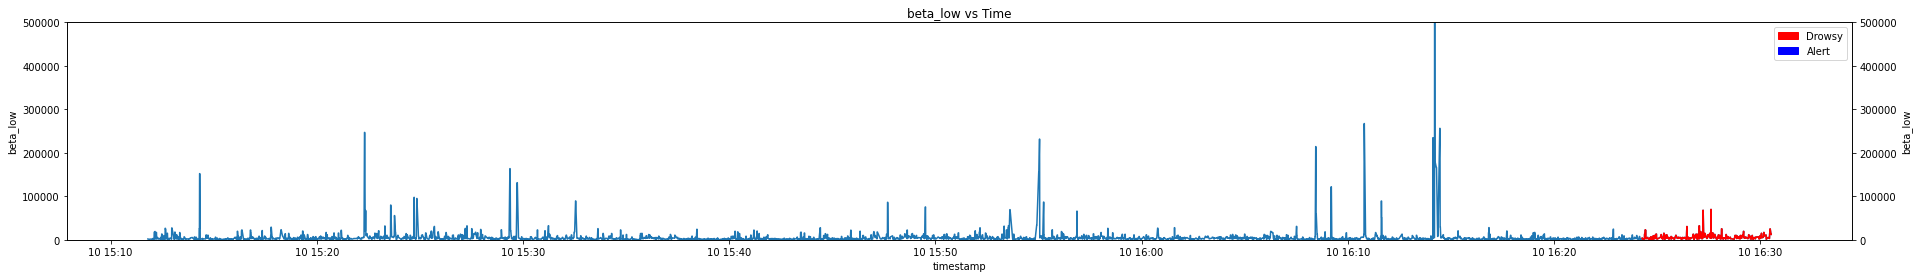

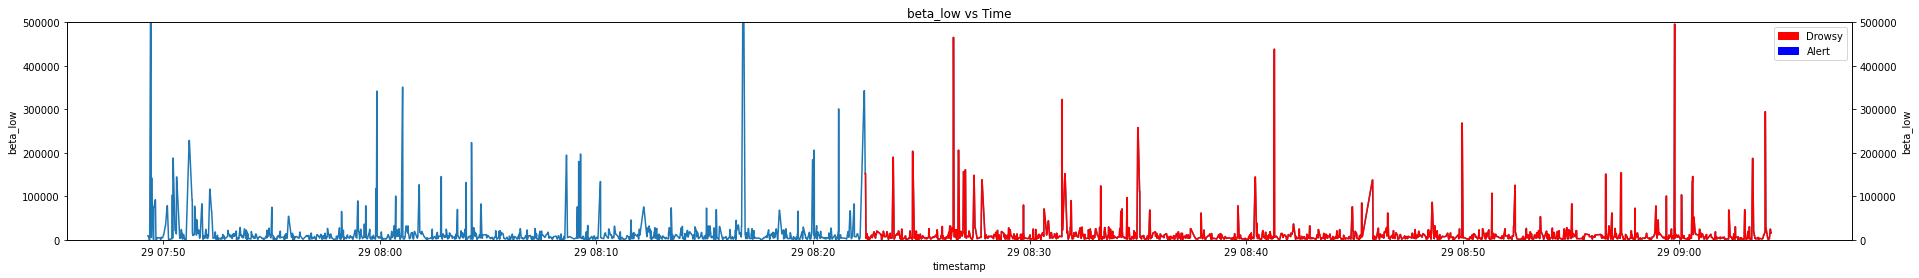

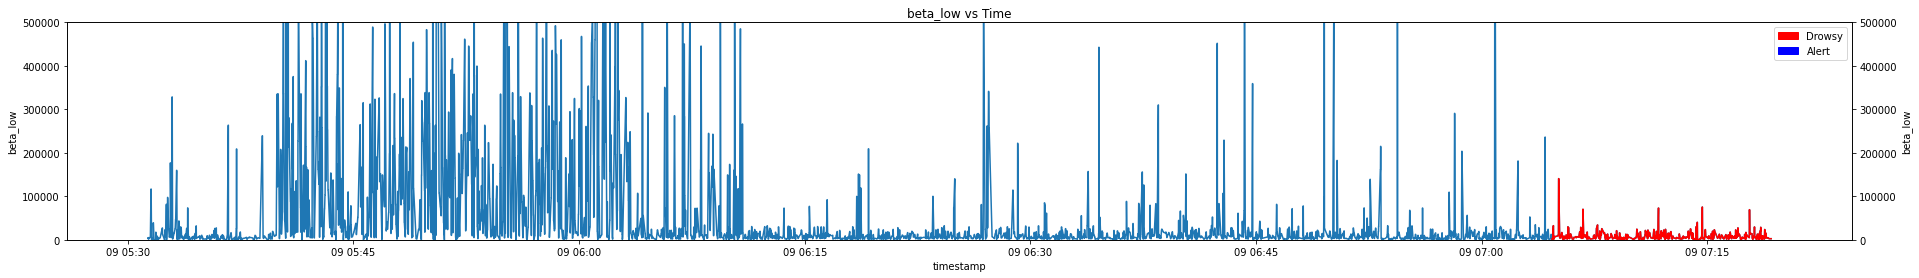

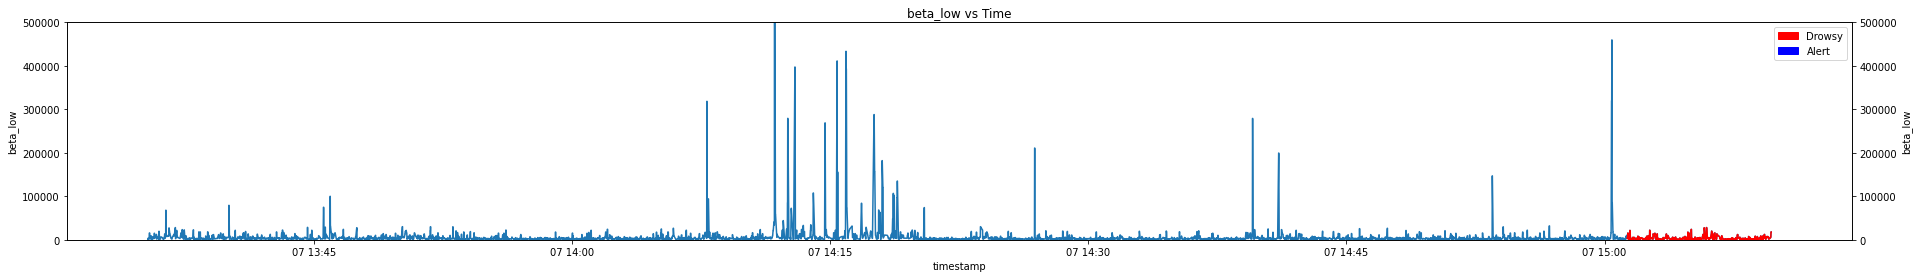

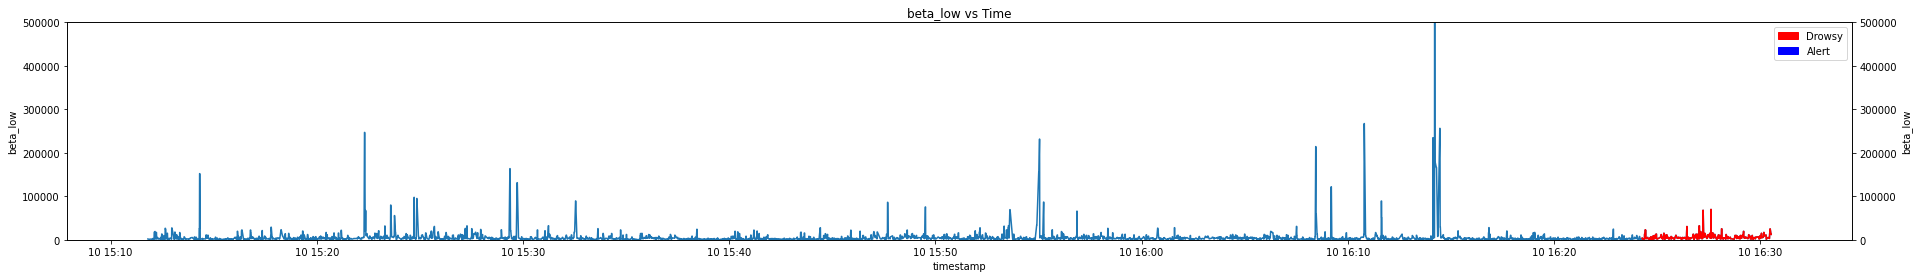

In [ ]:
beta_low_ylim = (0,500000)

for df in df_list:
  create_timeseries_line_plot(df,"beta_low",beta_low_ylim)

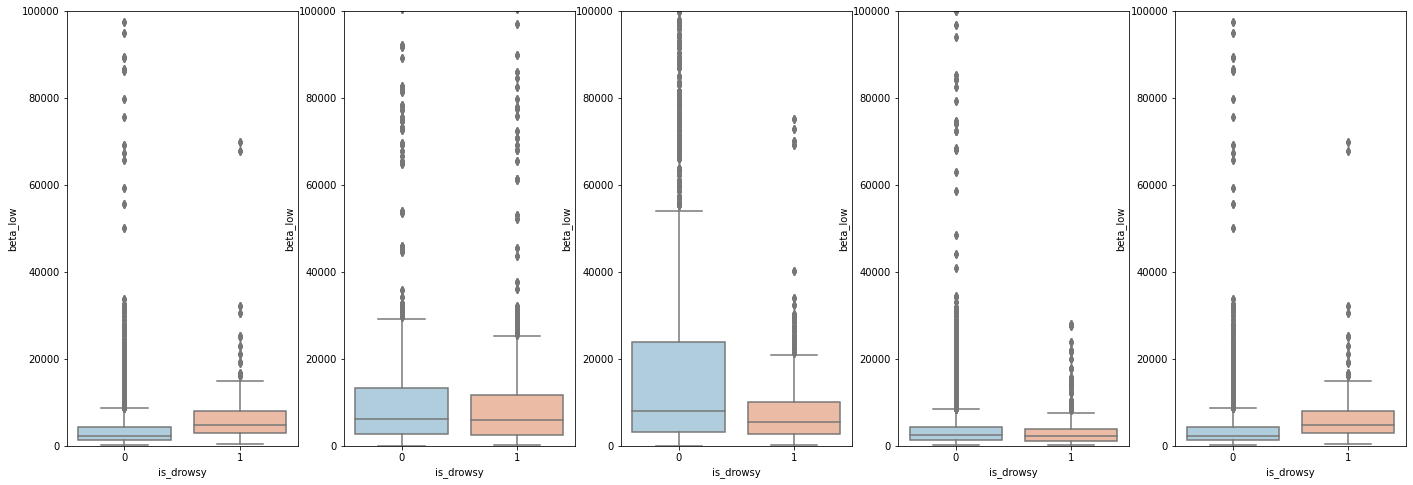

In [ ]:
create_box_plot(df_list,"beta_low",True,(0,100000))

<br>

###### 2.2.5 Gamma Low Waves

This wave is at 31-40Hz

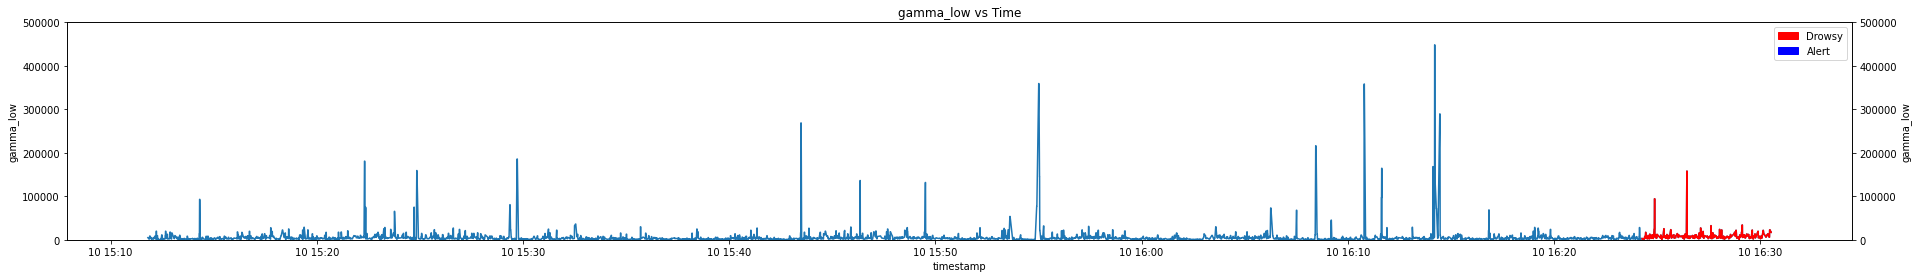

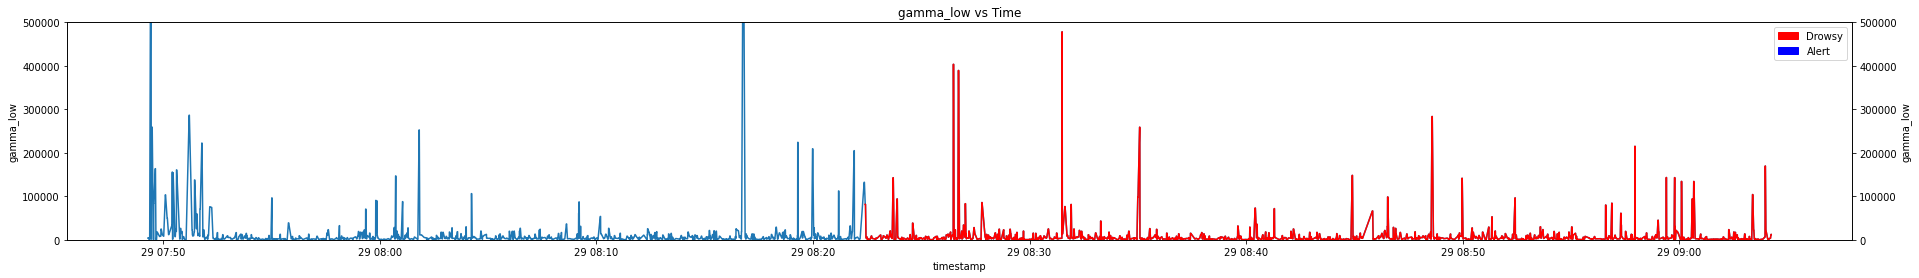

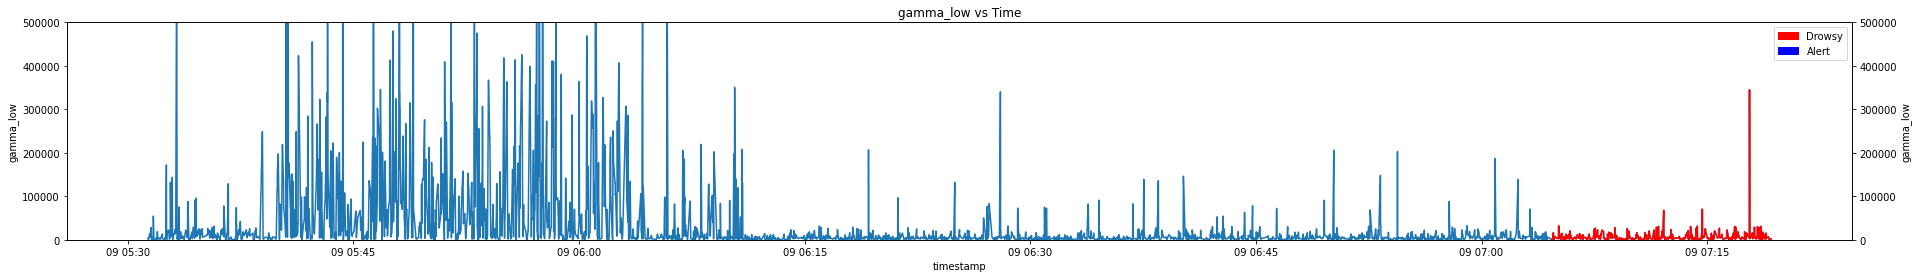

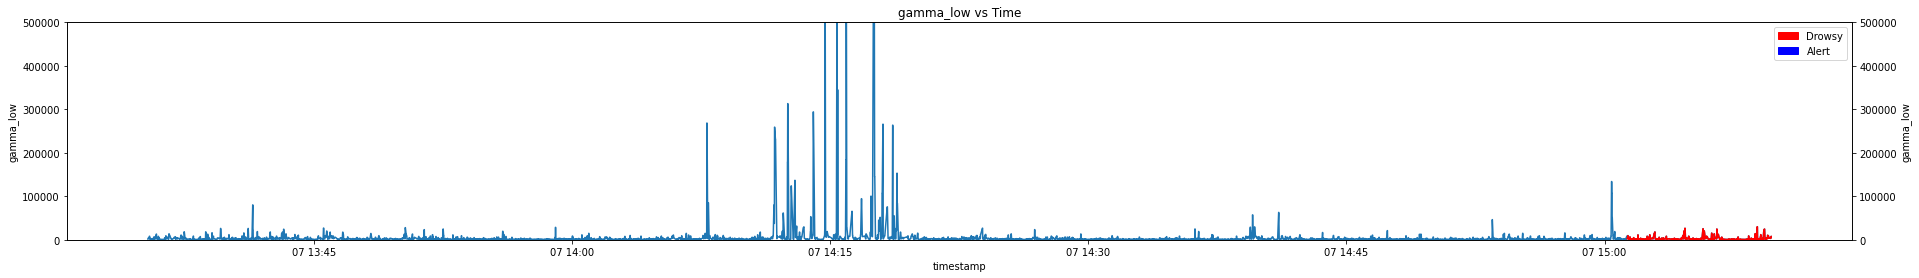

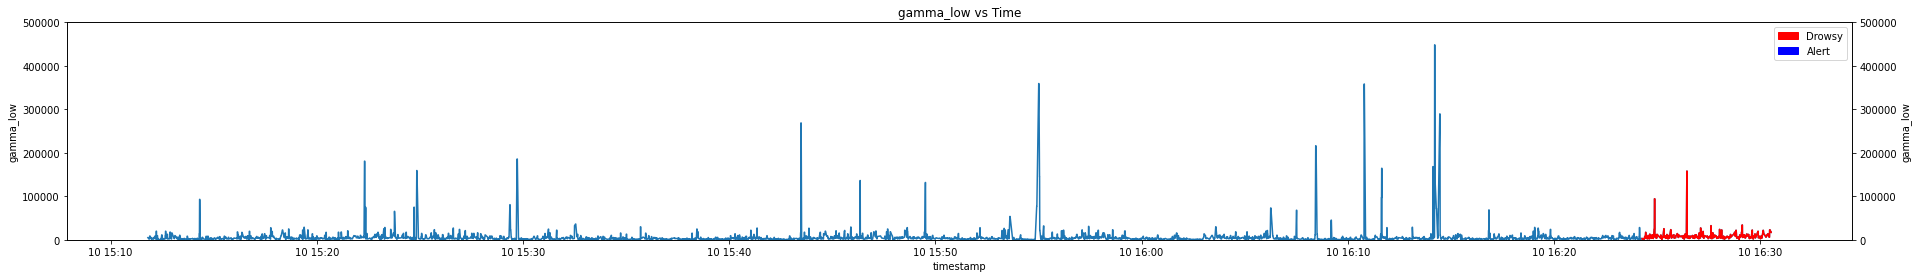

In [ ]:
gamma_low_ylim = (0,500000)

for df in df_list:
  create_timeseries_line_plot(df,"gamma_low",gamma_low_ylim)


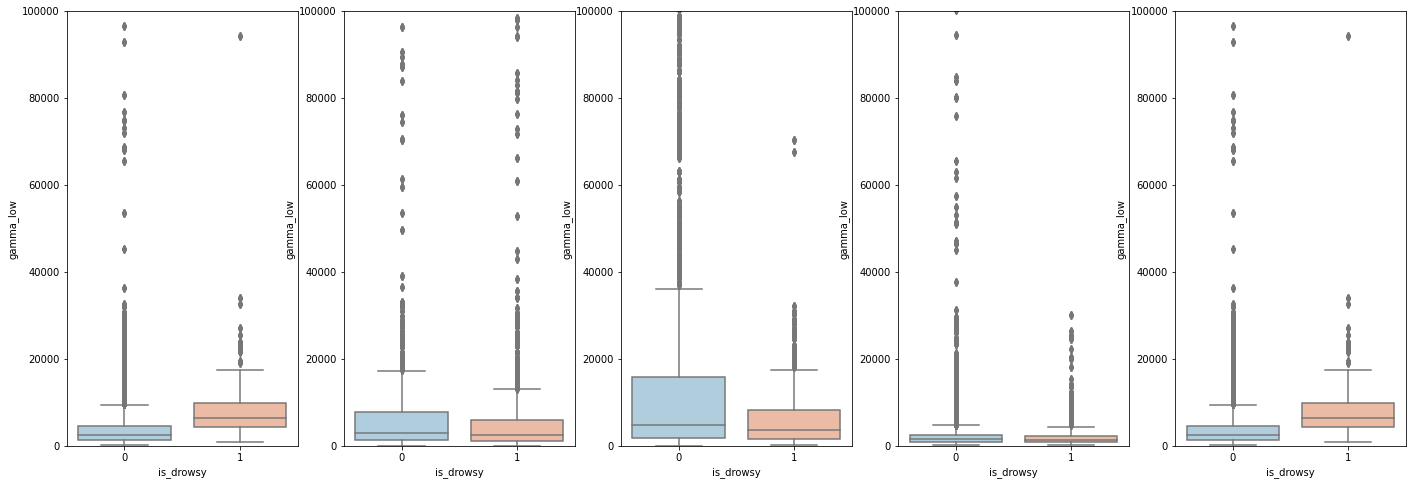

In [ ]:
create_box_plot(df_list,"gamma_low",True,(0,100000))

<br>

###### 2.2.6 Delta Waves

This wave is at 1-3Hz

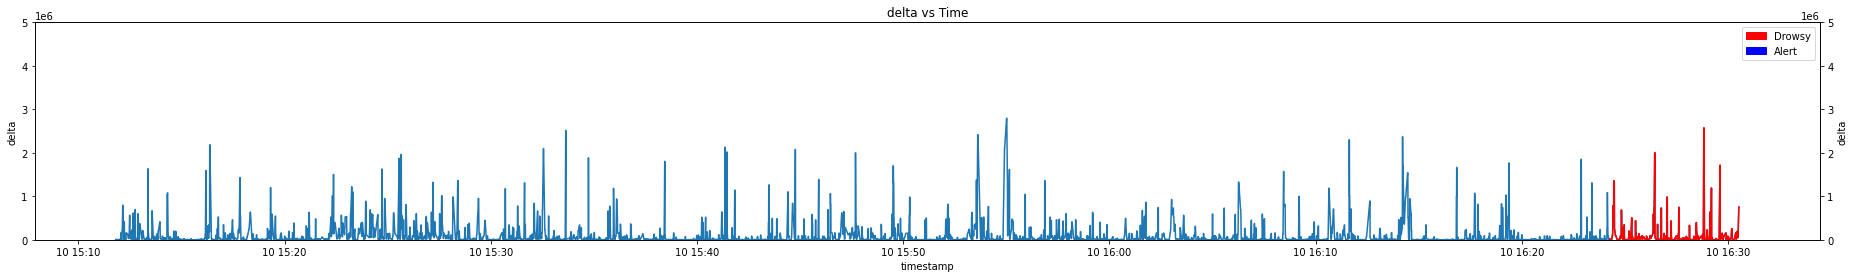

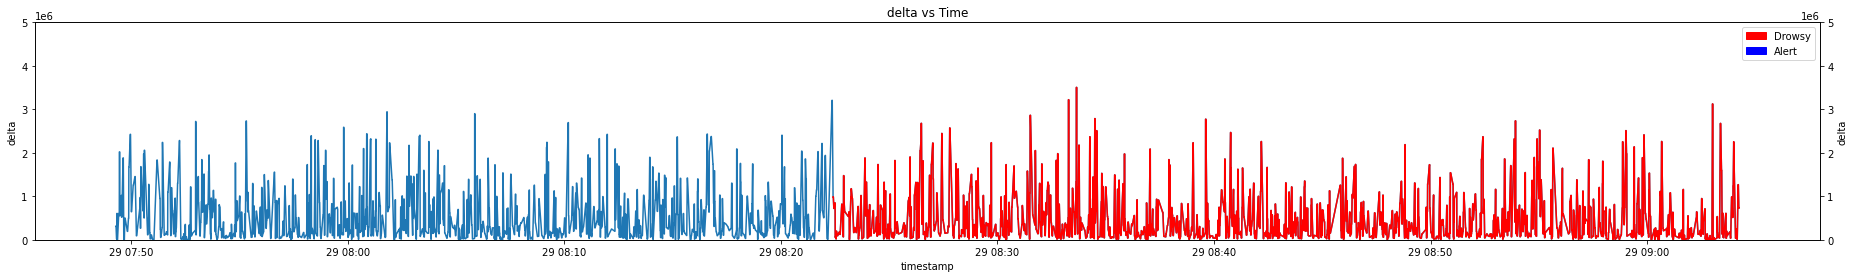

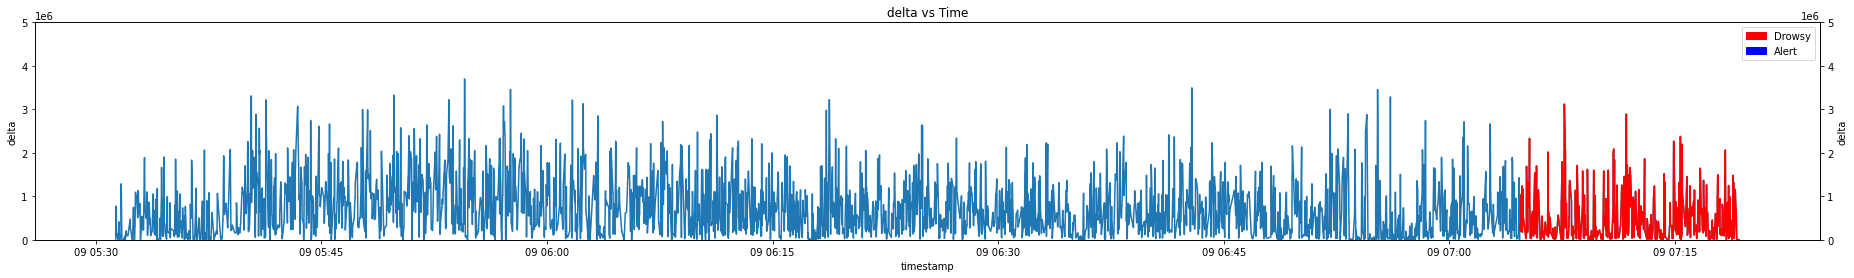

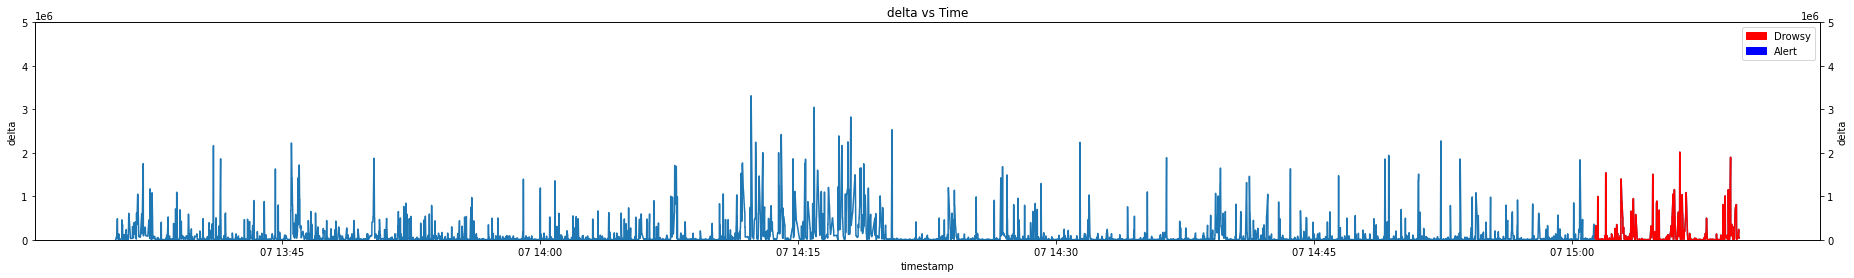

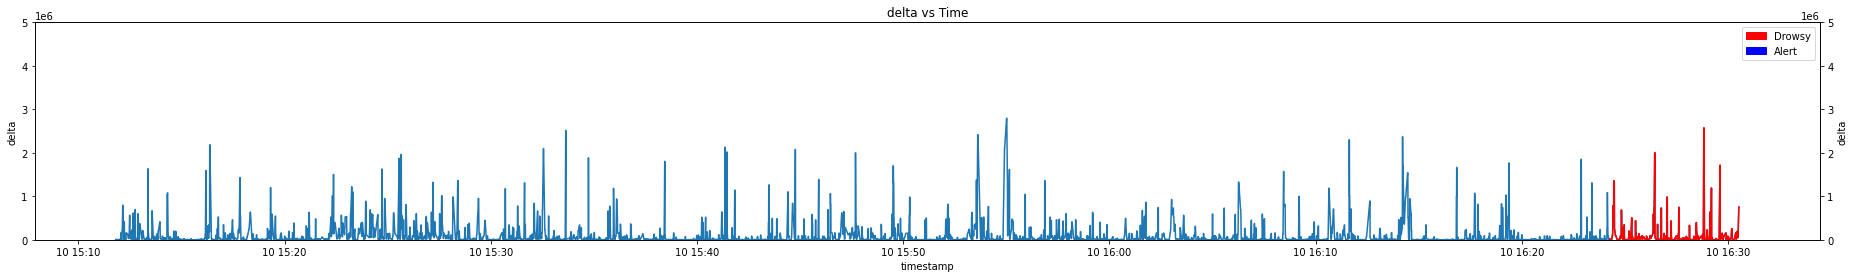

In [ ]:
delta_ylim = (0,5000000)

for df in df_list:
  create_timeseries_line_plot(df,"delta",delta_ylim)

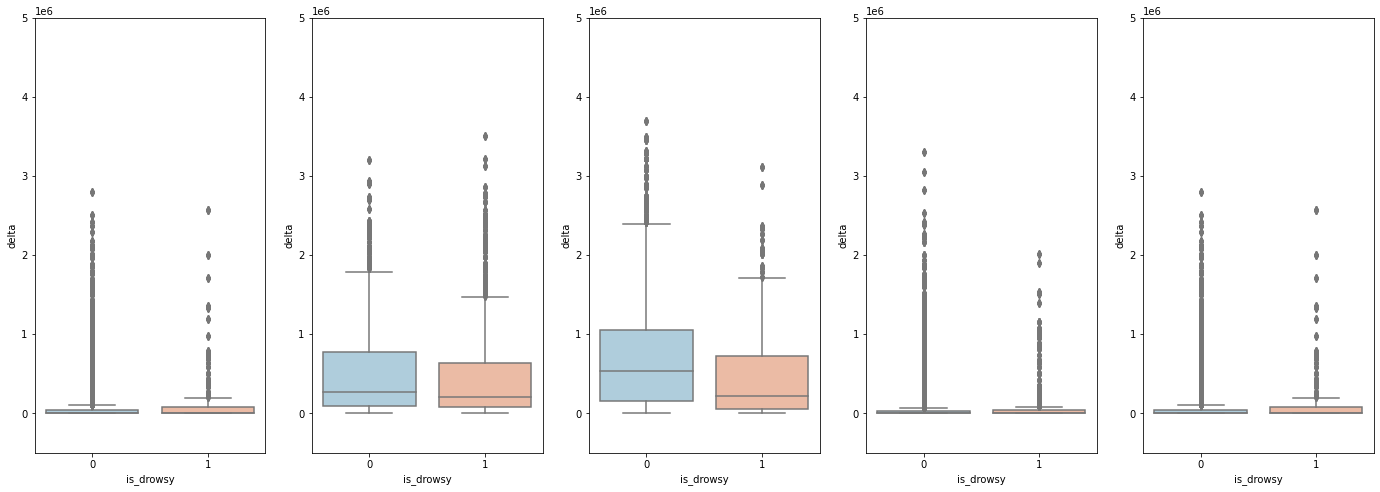

In [ ]:
create_box_plot(df_list,"delta",True,(-500000,5000000))

<br>

###### 2.2.7 Theta Waves

This wave is at 4-7Hz

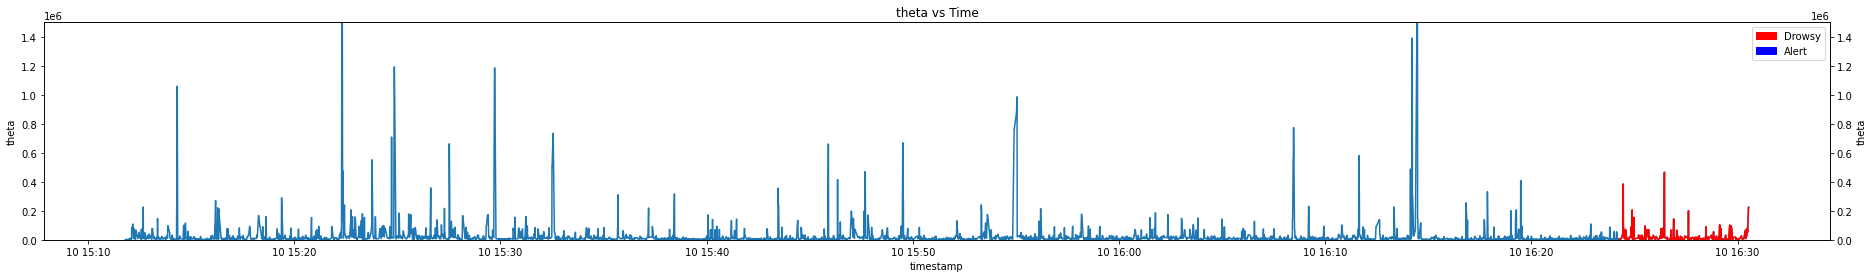

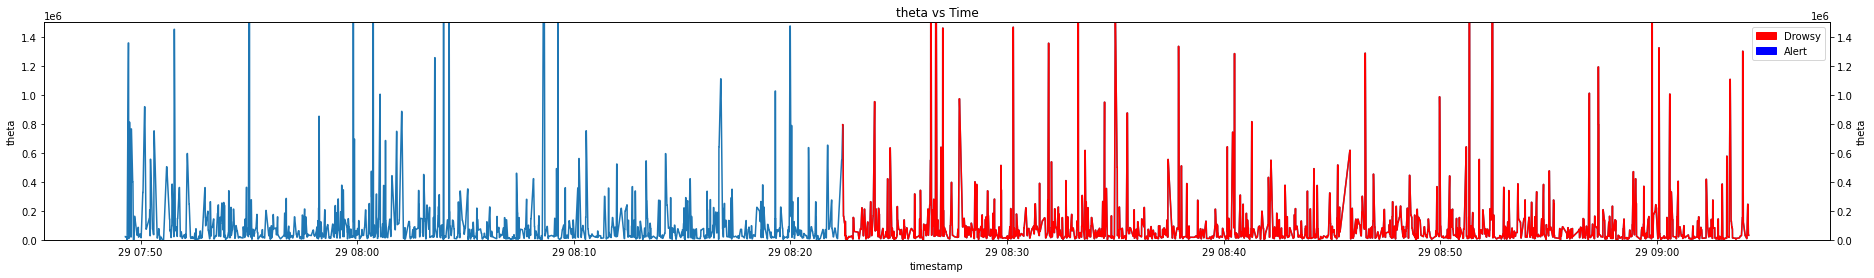

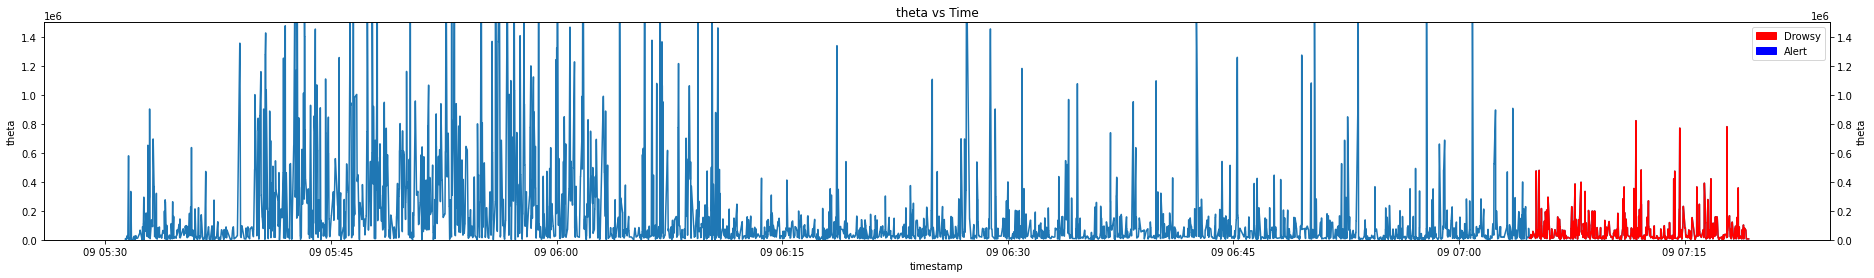

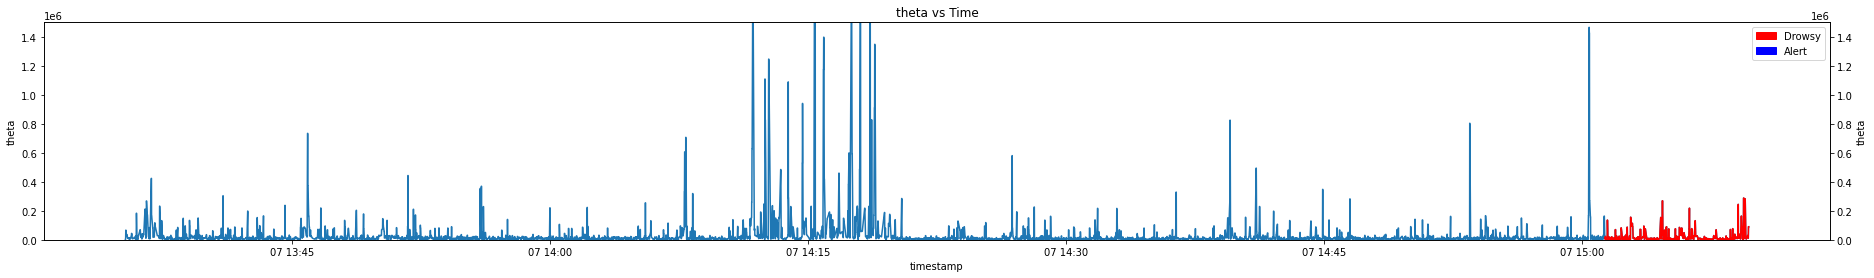

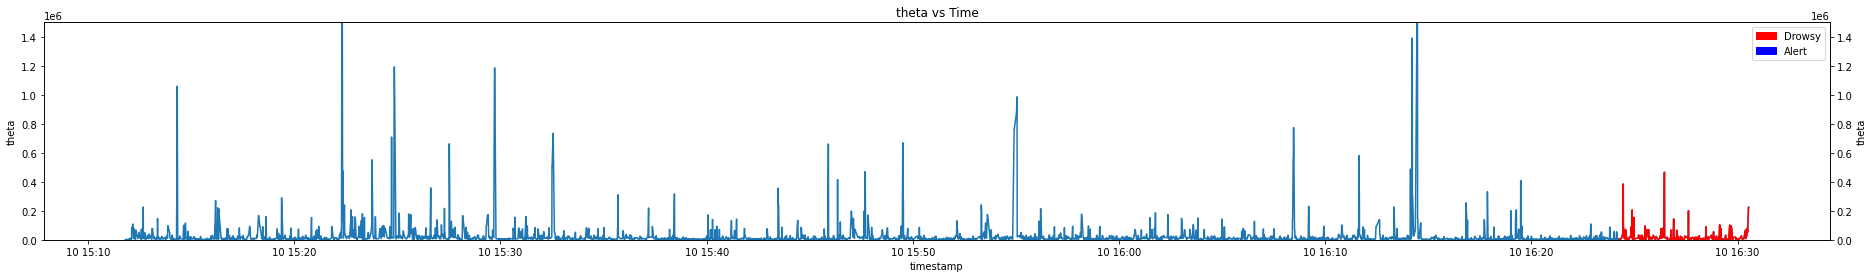

In [ ]:
theta_ylim = (0,1500000)

for df in df_list:
  create_timeseries_line_plot(df,"theta",theta_ylim)

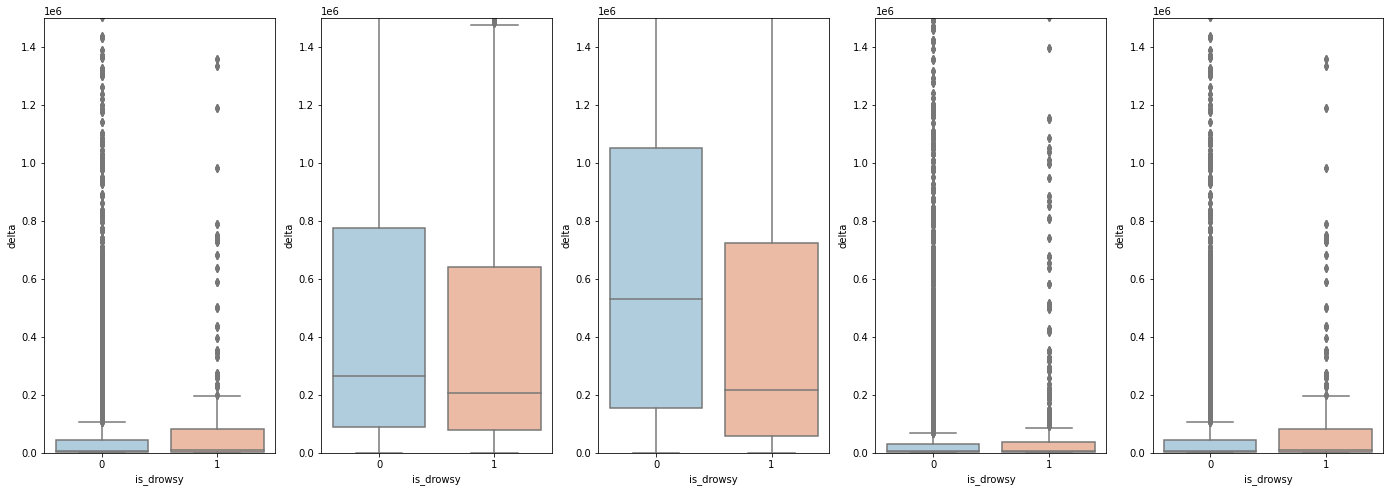

In [ ]:
create_box_plot(df_list,"delta",True,(0,1500000))

<br>

##### 2.4. Probability of Eye Opening

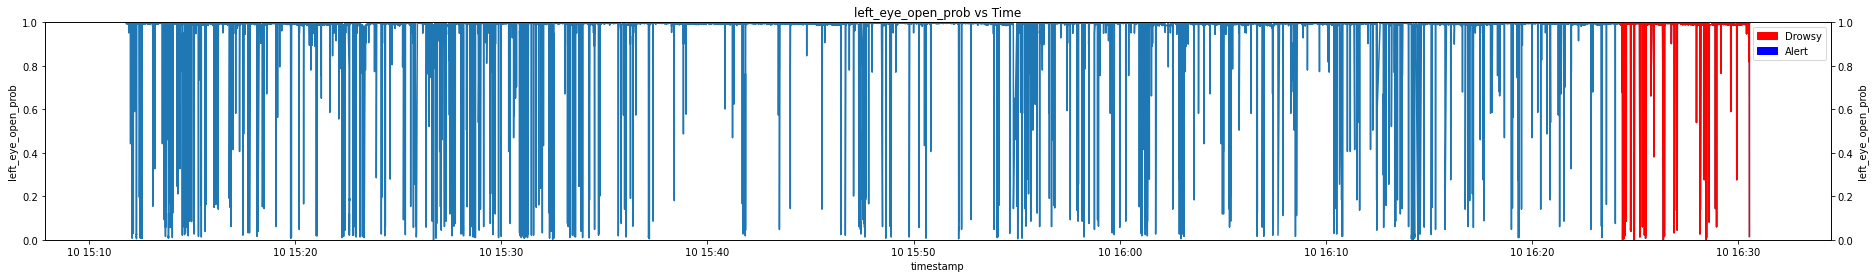

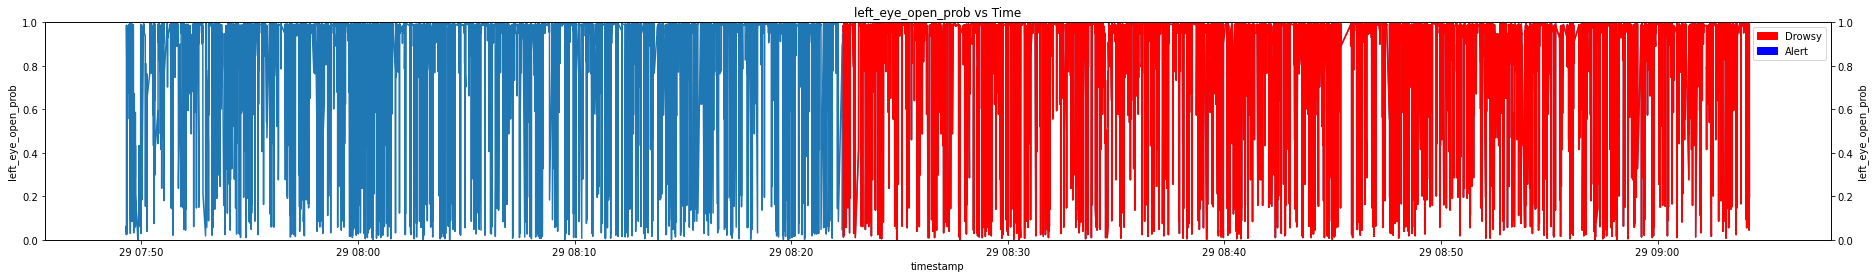

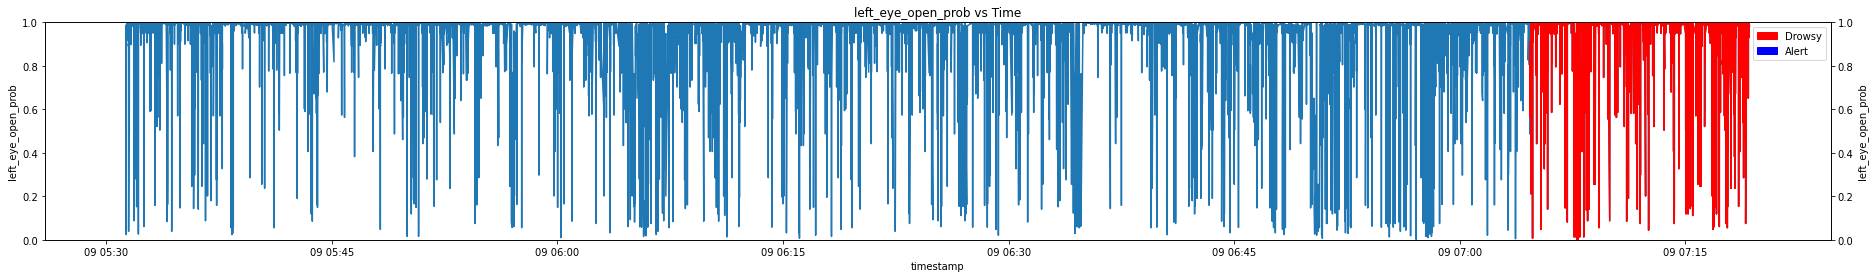

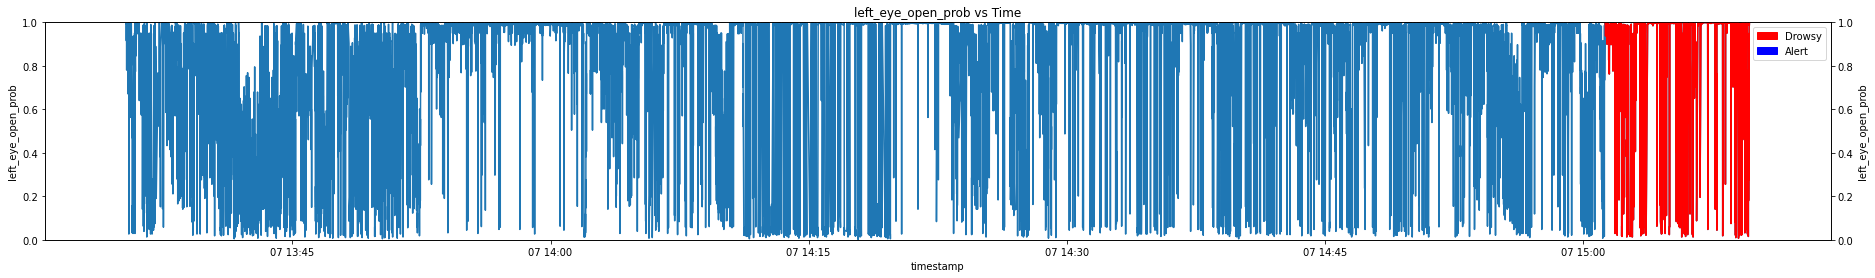

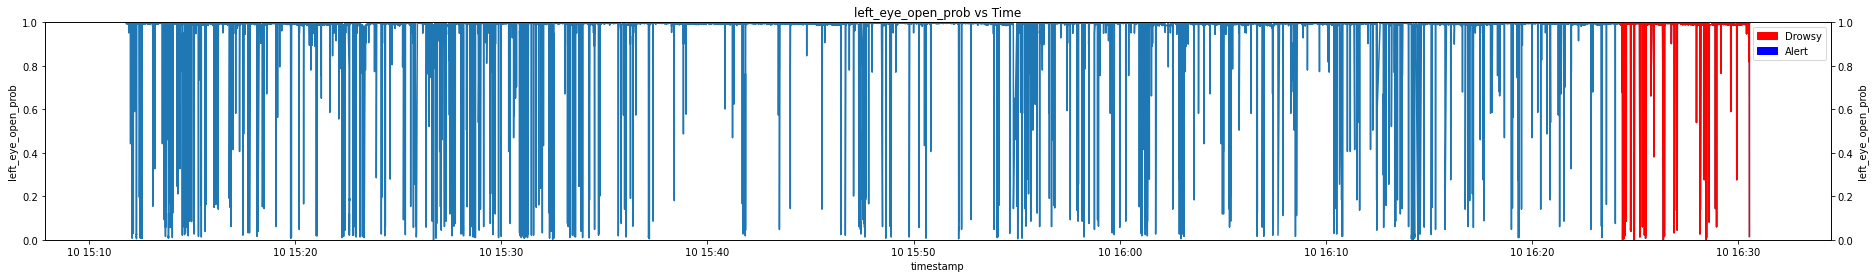

In [ ]:
eye_opening_ylim = (0,1)

for df in df_list:
  create_timeseries_line_plot(df,"left_eye_open_prob",eye_opening_ylim)


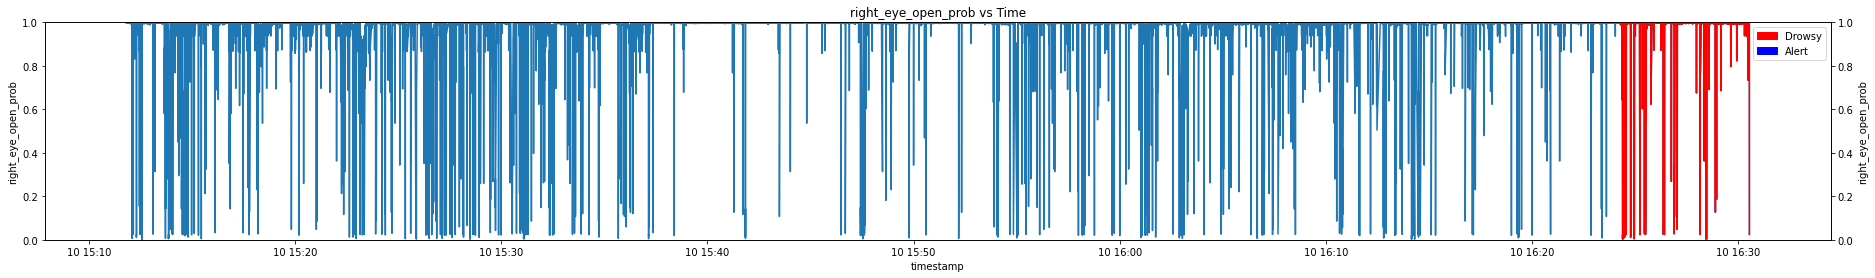

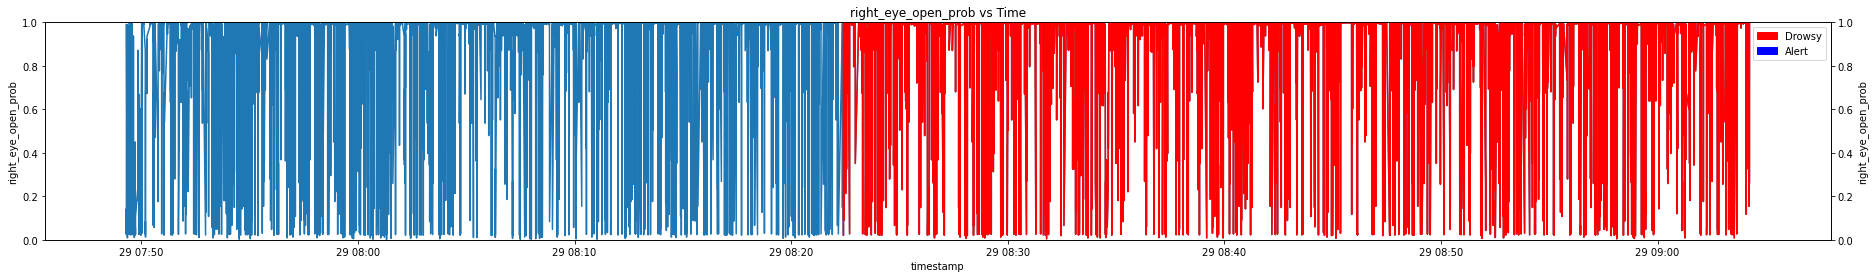

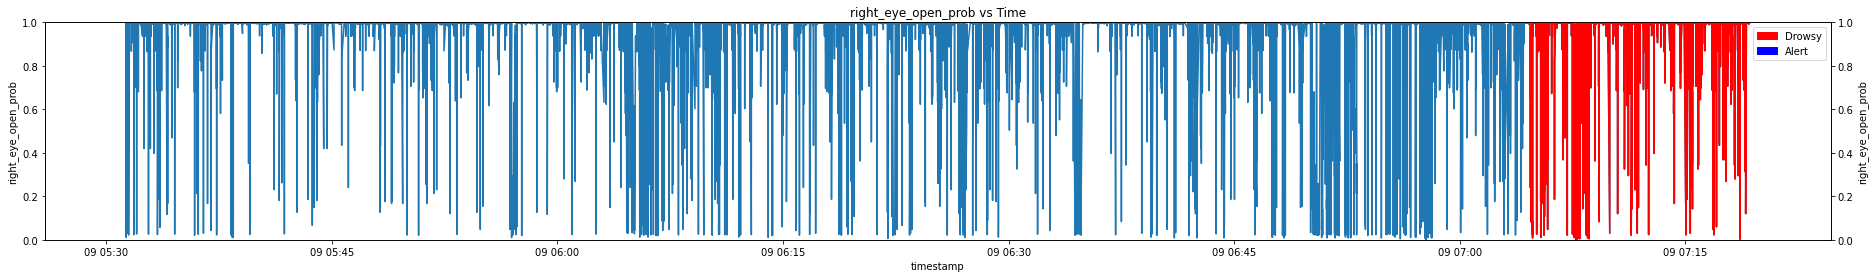

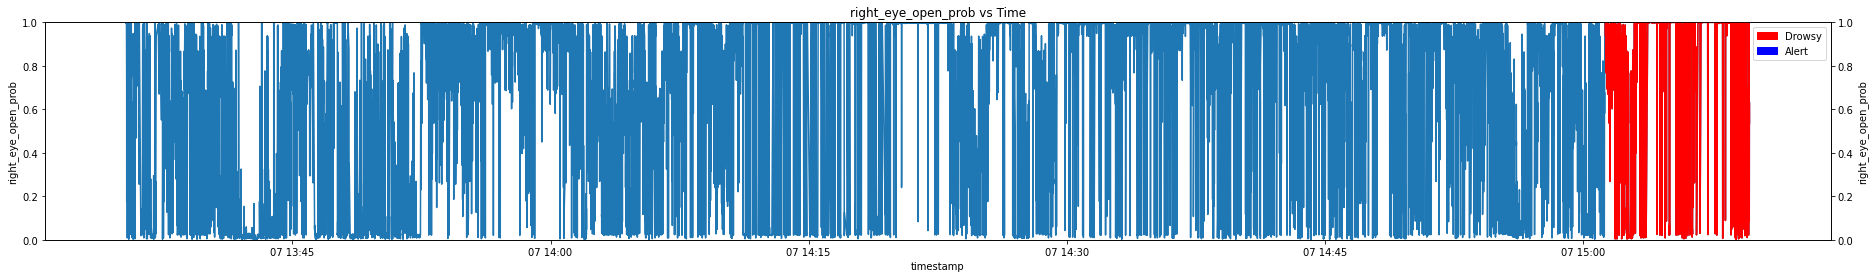

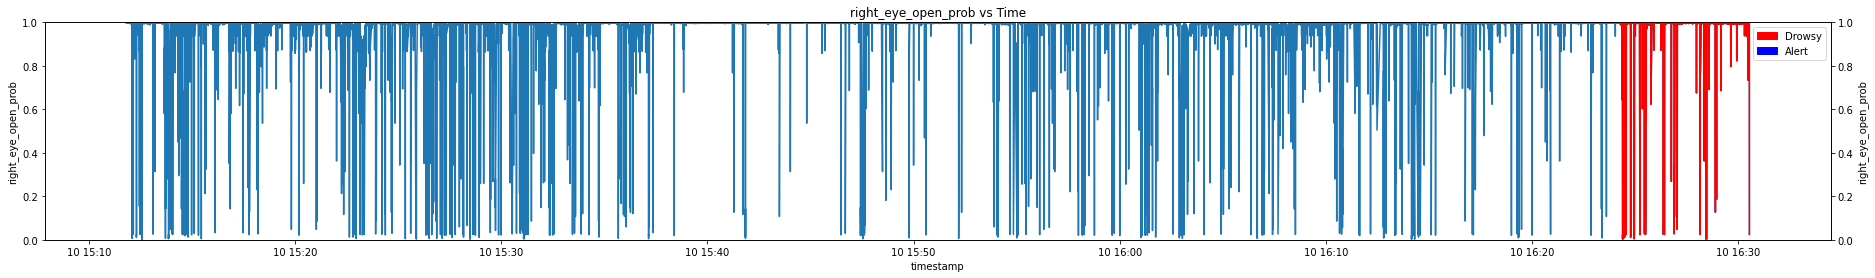

In [ ]:
for df in df_list:
  create_timeseries_line_plot(df,"right_eye_open_prob",eye_opening_ylim)

<br> <br>

#### 3. Feature Engineering

In [ ]:
def fit_standard_scaler(df_list,df_to_fit,feature_to_scale):
  #通过StandardScaler函数进行实例申请
  scaler = StandardScaler()
  for filename, df in df_list.items():
    if filename in df_to_fit:
      #fit方法会自动计算输入数据的均值，将其保存在scaler.mean_中，同样的标准差保存在scaler.scale_
      scaler.fit(df[feature_to_scale])

  print("mean: \n")
  print(scaler.mean_)
  print("\n\nstddev: \n")
  print(scaler.scale_)
  return scaler

def transform_standard_scaler(df_list,scaler,feature_to_scale):
  for filename, df in df_list.items():
    result = scaler.transform(df[feature_to_scale])
    df[feature_to_scale] = result


In [ ]:
feature_to_scale = ["heart_rate","alpha_high","theta"]

df_to_fit = ['data_diah','data_pascal2.csv','data_pascal3.csv']

scaler = fit_standard_scaler(df_list,df_to_fit,feature_to_scale)

mean: 

[8.19112431e+01 4.83662234e+04 1.78054490e+05]


stddev: 

[5.71323251e+00 1.08727488e+05 2.84735776e+05]


In [ ]:
transform_standard_scaler(df_list,scaler,feature_to_scale)

In [ ]:
for filename, df in df_list.items():
  print(filename+": \n")
  display(df.head(2))
  print("\n\n")

data_yohannes.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
94 2020-03-29 07:49:17.239000082   -3.135045  ...             0.025023          0
95 2020-03-29 07:49:17.322999954   -3.135045  ...             0.021787          0

[2 rows x 12 columns]




data_pascal2.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
690 2020-04-07 15:49:44.976000071    0.015535  ...             0.997431          0
691 2020-04-07 15:49:45.141000032    0.015535  ...             0.258916          0

[2 rows x 12 columns]




data_pascal3.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
111 2020-04-09 05:31:19.914999962   -1.034658  ...             0.995899          0
112 2020-04-09 05:31:20.043999910   -1.034658  ...             0.997431          0

[2 rows x 12 columns]




data_diah.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
86 2020-05-07 13:35:20.028000116   -2.084852  ...             0.995264          0
87 2020-05-07 13:35:20.210999966   -2.084852  ...             0.996212          0

[2 rows x 12 columns]




data_pascal4.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
104 2020-05-10 15:11:48.434999943   -1.034658  ...             0.996827          0
105 2020-05-10 15:11:48.523000001   -1.034658  ...             0.996827          0

[2 rows x 12 columns]




data_pascal5.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
75 2020-05-11 15:04:52.322999954      0.3656  ...             0.998313          0
76 2020-05-11 15:04:52.497999907      0.3656  ...             0.997131          0

[2 rows x 12 columns]




data_pascal6.csv: 



timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
71 2020-05-14 15:16:25.687999964   -2.609949  ...             0.998022          0
72 2020-05-14 15:16:25.851000071   -2.609949  ...             0.997431          0

[2 rows x 12 columns]

In [ ]:
SEQ_LEN = 3000
FUTURE_PERIOD_PREDICT = 1500

def create_target(df,future_period):
    df["target"] = df["is_drowsy"].shift(-future_period)
    df.dropna(inplace=True)
    df["target"] = df["target"].astype('Int64')
    return df

In [ ]:
for filename, df in df_list.items():
  create_target(df,FUTURE_PERIOD_PREDICT)
  print(filename+": \n")
  display(df.sample(2))
  print("\n\n")

data_yohannes.csv: 



timestamp  heart_rate  ...  is_drowsy  target
14024 2020-03-29 08:25:14.773000002    1.240761  ...          1       1
12721 2020-03-29 08:21:45.505000114    0.365600  ...          0       1

[2 rows x 13 columns]




data_pascal2.csv: 



timestamp  heart_rate  ...  is_drowsy  target
19424 2020-04-07 16:46:21.648000002   -1.559755  ...          0       0
12060 2020-04-07 16:22:28.884999990   -3.135045  ...          0       0

[2 rows x 13 columns]




data_pascal3.csv: 



timestamp  heart_rate  ...  is_drowsy  target
18766 2020-04-09 06:11:28.434000015    0.715664  ...          0       0
18059 2020-04-09 06:09:57.451999903    1.590826  ...          0       0

[2 rows x 13 columns]




data_diah.csv: 



timestamp  heart_rate  ...  is_drowsy  target
10936 2020-05-07 14:07:45.280999899    0.540632  ...          0       0
19158 2020-05-07 14:33:54.482000113   -6.635691  ...          0       0

[2 rows x 13 columns]




data_pascal4.csv: 



timestamp  heart_rate  ...  is_drowsy  target
6199  2020-05-10 15:27:58.142999887    0.365600  ...          0       0
14149 2020-05-10 15:49:32.124000072   -1.734787  ...          0       0

[2 rows x 13 columns]




data_pascal5.csv: 



timestamp  heart_rate  ...  is_drowsy  target
17284 2020-05-11 15:52:19.219000101   -0.159497  ...          0       0
23962 2020-05-11 16:11:16.036999941   -1.209691  ...          0       0

[2 rows x 13 columns]




data_pascal6.csv: 



timestamp  heart_rate  ...  is_drowsy  target
15798 2020-05-14 15:56:44.713999987   -1.559755  ...          0       0
21128 2020-05-14 16:10:28.302000046   -1.209691  ...          0       0

[2 rows x 13 columns]

In [ ]:
def create_data(df,seq_len):
    df = df[["heart_rate","alpha_high","theta","left_eye_open_prob","right_eye_open_prob","target"]]
    sequential_data = []
    prev_state = deque(maxlen=seq_len)
    for i in df.values:
        prev_state.append([n for n in i[:-1]])
        if len(prev_state)==seq_len:
            sequential_data.append([np.array(prev_state), i[-1]])

    random.shuffle(sequential_data)
    return df, sequential_data

def down_sampling(_sequential_data):
  drowsy=[]
  alert=[]
  for seq, target in _sequential_data:
      if target==0:
          drowsy.append([seq,target])
      else:
          alert.append([seq,target])

  random.shuffle(drowsy)
  random.shuffle(alert)

  lower = min(len(drowsy), len(alert))

  drowsy = drowsy[:lower]
  alert = alert[:lower]

  sequential_data = drowsy + alert
  random.shuffle(sequential_data)
  return sequential_data

def create_training_label_data(sequential_data):
  X = []
  y = []
  for seq, target in sequential_data:
      X.append(seq)
      y.append(target)
  return np.array(X),np.array(y)

def form_data(df_list, data_to_create,down_sample=True):
  data = []
  for filename, df in df_list.items():
    if filename in data_to_create:
      df, sequential_data = create_data(df,SEQ_LEN)
      if(down_sample):
        sequential_data = down_sampling(sequential_data)
      data = data + sequential_data

  X, y = create_training_label_data(data)
  X.astype(np.float32)
  y.astype(np.float32)
  return X,y


In [ ]:
testing_data_list = ['data_pascal4.csv']
X_test, y_test = form_data(df_list,testing_data_list, False)

In [ ]:
drowsy=0
alert=0
total_train_data = len(training_data)
total_test_data = len(testing_data)
for seq,label in testing_data_list:
  if label==1:
    drowsy+=1
  else:
    alert+=1

print(f"total training data: {total_train_data}")
print(f"total training data: {total_test_data}")
print(f"drowsy data: {drowsy}")
print(f"alert data: {alert}")

total training data: 36788
total training data: 20090
drowsy data: 5231
alert data: 31557


In [ ]:
weight_for_alert = (1 / alert)*(total_train_data)/2.0
weight_for_drowsy = (1 / drowsy)*(total_train_data)/2.0

print(f"drowsy class weight: {weight_for_drowsy}")
print(f"alert class weight: {weight_for_alert}")

drowsy class weight: 3.5163448671382147
alert class weight: 0.5828817694964668


<br> <br>

#### 3. Modeling

In [ ]:
DESIRED_ACCURACY = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def __init__(self, training, validation):
        super(myCallback, self).__init__()
        self.validation = validation
        self.training = training
        self.isDesiredAccuracyAcq = False

    def on_train_begin(self, logs={}):
        self._f1s = []
        self._recalls = []
        self._precisions = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
      val_predict = (np.asarray(self.model.predict(self.validation[0]))).round()
      _predict = (np.asarray(self.model.predict(self.training[0]))).round()

      val_targ = self.validation[1]
      _targ = self.training[1]

      _f1 = f1_score(_targ, _predict)
      _recall = recall_score(_targ, _predict)
      _precision = precision_score(_targ, _predict)

      _val_f1 = f1_score(val_targ, val_predict)
      _val_recall = recall_score(val_targ, val_predict)
      _val_precision = precision_score(val_targ, val_predict)

      self._f1s.append(_f1)
      self._recalls.append(_recall)
      self._precisions.append(_val_precision)

      self.val_f1s.append(_val_f1)
      self.val_recalls.append(_val_recall)
      self.val_precisions.append(_val_precision)

      print ("\nf1: %f — precision: %f — recall %f"%(_f1, _precision, _recall))
      print ("val_f1: %f — val_precision: %f — val_recall %f"%(_val_f1, _val_precision, _val_recall))
      print ("\n\n")

      if(_val_f1 >= DESIRED_ACCURACY):
          self.isDesiredAccuracyAcq = True
          print(f"Reached {DESIRED_ACCURACY}% f1-score, cancelling training!")
          self.model.stop_training = True


NameError: ignored

###### 4.1 LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=X_train.shape[1:], return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss="binary_crossentropy",
             optimizer=opt,
             metrics=[
                keras.metrics.TruePositives(name='tp'),
                keras.metrics.FalsePositives(name='fp'),
                keras.metrics.TrueNegatives(name='tn'),
                keras.metrics.FalseNegatives(name='fn'),
                keras.metrics.BinaryAccuracy(name='accuracy'),
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall'),
             ])


history = model.fit(X_train,
                   y_train,
                   batch_size=64,
                   epochs=10,
                   validation_data=(X_test,y_test),
                   verbose=1)

Epoch 1/10
327/327 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.6080
f1: 0.669081 — precision: 0.502721 — recall 1.000000
val_f1: 0.171977 — val_precision: 0.094078 — val_recall 1.000000



327/327 [==============================] - 342s 1s/step - loss: 0.6934 - accuracy: 0.6080
Epoch 2/10
327/327 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.6677
f1: 0.302808 — precision: 0.417298 — recall 0.237616
val_f1: 0.005191 — val_precision: 0.004294 — val_recall 0.006562



327/327 [==============================] - 342s 1s/step - loss: 0.6159 - accuracy: 0.6677
Epoch 3/10
327/327 [==============================] - ETA: 0s - loss: 0.5776 - accuracy: 0.6928
f1: 0.680615 — precision: 0.519528 — recall 0.986490
val_f1: 0.171802 — val_precision: 0.093974 — val_recall 1.000000



327/327 [==============================] - 340s 1s/step - loss: 0.5776 - accuracy: 0.6928
Epoch 4/10
327/327 [==============================] - ETA: 0s - loss: 0.4948 - 

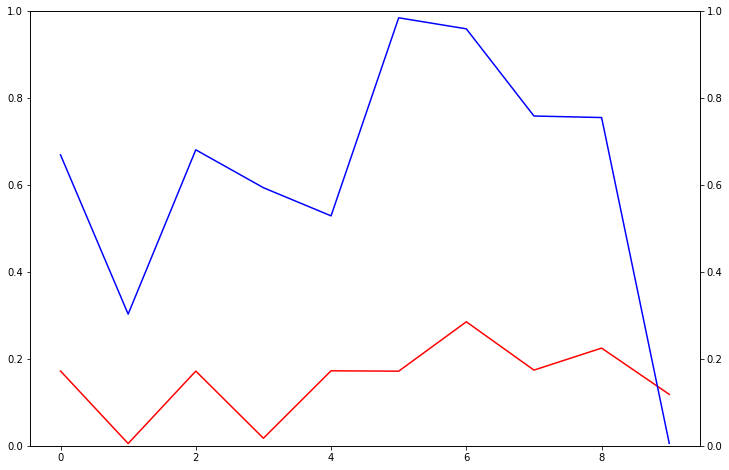

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax1 = ax.twinx()
sns.lineplot(x=[x for x in range(len(callbacks.val_f1s))], y=callbacks.val_f1s, color="red",ax=ax)
sns.lineplot(x=[x for x in range(len(callbacks._f1s))], y=callbacks._f1s, color="blue",ax=ax)
ax.set(ylim=(0,1))
ax1.set(ylim=(0,1))
plt.show()

In [ ]:
model_predict = model.predict(X_test)
prediction = np.where(model_predict> 0.5, 1, 0)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     21489
           1       0.13      0.11      0.12      2870

    accuracy                           0.81     24359
   macro avg       0.51      0.51      0.51     24359
weighted avg       0.80      0.81      0.80     24359



###### 4.2 CNN Model

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv1D(100, 10, input_shape=X_test.shape[1:]))
cnn_model.add(Conv1D(100, 10))
cnn_model.add(MaxPooling1D(3))

cnn_model.add(Conv1D(160, 10))
cnn_model.add(Conv1D(160, 10))
cnn_model.add(GlobalAveragePooling1D())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(128))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
cnn_model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=[
                    keras.metrics.BinaryAccuracy(name='accuracy'),
                    keras.metrics.Precision(name='precision'),
                    keras.metrics.Recall(name='recall'),
                    keras.metrics.FalsePositives(name='fp'),
                    keras.metrics.FalseNegatives(name='fn'),
                    keras.metrics.TrueNegatives(name='tn'),
                    keras.metrics.TruePositives(name='tp'),
                  ])

In [ ]:
for x in range(10):
  training_data_list = ['data_pascal2.csv','data_pascal3.csv','data_diah.csv']
  X_train, y_train = form_data(df_list,testing_data_list)
  cnn_callbacks = myCallback(training=(X_train, y_train), validation=(X_test, y_test))
  cnn_model_history = cnn_model.fit(X_train,
                                    y_train,
                                    batch_size=64,
                                    epochs=10,
                                    validation_data = (X_test,y_test),
                                    callbacks=[cnn_callbacks])
  print(f"{x+1}/10 random iteration\n\n")

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.7294 - precision: 0.7385 - recall: 0.7104 - fp: 477.0000 - fn: 549.0000 - tn: 1419.0000 - tp: 1347.0000
f1: 0.864658 — precision: 0.899658 — recall 0.832278
val_f1: 0.613411 — val_precision: 0.485688 — val_recall 0.832278



60/60 [==============================] - 43s 723ms/step - loss: 0.5307 - accuracy: 0.7294 - precision: 0.7385 - recall: 0.7104 - fp: 477.0000 - fn: 549.0000 - tn: 1419.0000 - tp: 1347.0000 - val_loss: 0.3162 - val_accuracy: 0.9010 - val_precision: 0.4857 - val_recall: 0.8323 - val_fp: 1671.0000 - val_fn: 318.0000 - val_tn: 16523.0000 - val_tp: 1578.0000
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3401 - accuracy: 0.8513 - precision: 0.8412 - recall: 0.8660 - fp: 310.0000 - fn: 254.0000 - tn: 1586.0000 - tp: 1642.0000
f1: 0.721079 — precision: 1.000000 — recall 0.563819
val_f1: 0.721079 — val_precision: 1.000000 — val_recall 0.563819



60/60 [=========

KeyboardInterrupt: ignored

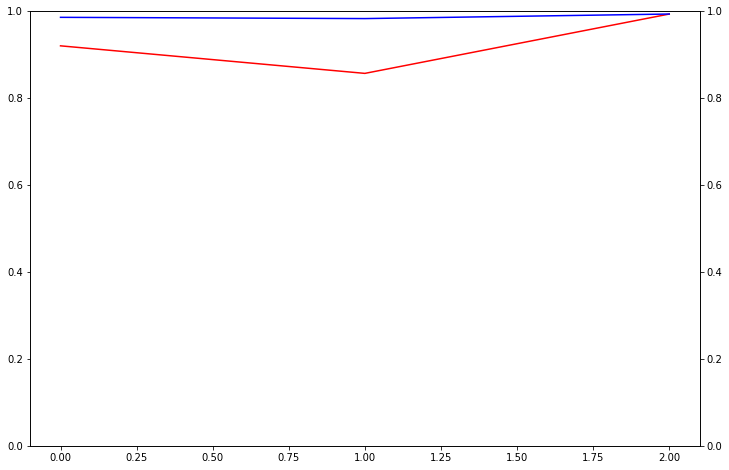

In [ ]:
  fig,ax=plt.subplots(figsize=(12,8))
ax1 = ax.twinx()
sns.lineplot(x=[x for x in range(len(cnn_callbacks.val_f1s))], y=cnn_callbacks.val_f1s, color="red",ax=ax)
sns.lineplot(x=[x for x in range(len(cnn_callbacks._f1s))], y=cnn_callbacks._f1s, color="blue",ax=ax)
ax.set(ylim=(0,1))
ax1.set(ylim=(0,1))
plt.show()

In [ ]:
cnn_model_predict = cnn_model.predict(X_train)
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1923
           1       0.99      1.00      0.99      1869

    accuracy                           0.99      3792
   macro avg       0.99      0.99      0.99      3792
weighted avg       0.99      0.99      0.99      3792



In [ ]:
cnn_model_predict = cnn_model.predict(X_test)
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18221
           1       0.99      1.00      0.99      1869

    accuracy                           1.00     20090
   macro avg       0.99      1.00      1.00     20090
weighted avg       1.00      1.00      1.00     20090



In [ ]:
testing_data_list5 = ['data_pascal6.csv']
X_test2, y_test2 = form_data(df_list,testing_data_list5,False)

In [ ]:
cnn_model_predict = cnn_model.predict(X_test2)
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_test2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16718
           1       0.00      0.00      0.00         0

    accuracy                           0.94     16718
   macro avg       0.50      0.47      0.48     16718
weighted avg       1.00      0.94      0.97     16718



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn_model_predict = cnn_model.predict(X_test3)
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_test3))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       618
           1       1.00      0.68      0.81      1704

    accuracy                           0.77      2322
   macro avg       0.77      0.84      0.75      2322
weighted avg       0.88      0.77      0.78      2322



In [ ]:
unique_elements, counts_elements = np.unique(y_test3, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[0.000e+00 1.000e+00]
 [1.161e+03 1.161e+03]]


In [ ]:
saved_model_path = "drive/My Drive/Skripsi/models/cnn_model2"

loaded_model = tf.keras.models.load_model(saved_model_path)

In [ ]:
loaded_model_predict = loaded_model.predict(X_train)
loaded_model_prediction = np.where(loaded_model_predict> 0.5, 1, 0)
print(classification_report(loaded_model_prediction,y_train))

              precision    recall  f1-score   support

           0       0.19      0.61      0.30      4190
           1       0.88      0.52      0.65     22202

    accuracy                           0.54     26392
   macro avg       0.54      0.57      0.47     26392
weighted avg       0.77      0.54      0.60     26392



In [ ]:
loaded_model_predict = loaded_model.predict(X_test)
loaded_model_prediction = np.where(loaded_model_predict> 0.5, 1, 0)
print(classification_report(loaded_model_prediction,y_test))

              precision    recall  f1-score   support

           0       0.05      0.87      0.09      1220
           1       0.93      0.09      0.17     23139

    accuracy                           0.13     24359
   macro avg       0.49      0.48      0.13     24359
weighted avg       0.89      0.13      0.16     24359



In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20133 entries, 111 to 46864
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   heart_rate           20133 non-null  float64
 1   alpha_high           20133 non-null  float64
 2   theta                20133 non-null  float64
 3   left_eye_open_prob   20133 non-null  float64
 4   right_eye_open_prob  20133 non-null  float64
 5   target               20133 non-null  Int64  
dtypes: Int64(1), float64(5)
memory usage: 1.1 MB


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.experimental_new_converter = True
cnn_tflite_model = converter.convert()

In [ ]:
model_name = "cnn_model2"
model.save(model_name)
!zip -r /content/{model_name}.zip /content/{model_name}
open(f"{model_name}.tflite", "wb").write(cnn_tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: cnn_model2/assets


INFO:tensorflow:Assets written to: cnn_model2/assets


  adding: content/cnn_model2/ (stored 0%)
  adding: content/cnn_model2/assets/ (stored 0%)
  adding: content/cnn_model2/saved_model.pb (deflated 90%)
  adding: content/cnn_model2/variables/ (stored 0%)
  adding: content/cnn_model2/variables/variables.index (deflated 73%)
  adding: content/cnn_model2/variables/variables.data-00001-of-00002 (deflated 7%)
  adding: content/cnn_model2/variables/variables.data-00000-of-00002 (deflated 81%)


2367800

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(3000,5), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss="binary_crossentropy",
             optimizer=opt,
             metrics=["accuracy"])


history = model.fit(X,
                   y,
                   batch_size=64,
                   epochs=1,
                   callbacks=[callbacks],
                   verbose=1)

253/253 [==============================] - 97s 383ms/step - loss: 0.6061 - accuracy: 0.7068


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               68608     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 68,737
Trainable params: 68,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(3000,5,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(loss="binary_crossentropy",
          optimizer=opt,
          metrics=["accuracy"],
          )

In [ ]:
cnn_model.fit(X.reshape(X.shape[0],3000,5,1),
              y,
              epochs=1,
              steps_per_epoch=16,
              callbacks=[callbacks]
              )

16/16 [==============================] - 4s 261ms/step - loss: 1677709.2500 - accuracy: 0.5183


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.experimental_new_converter = True
cnn_tflite_model = converter.convert()

In [ ]:
model_name = "cnn_model1"
# model.save(model_name)
# !zip -r /content/{model_name}.zip /content/{model_name}
open(f"{model_name}.tflite", "wb").write(cnn_tflite_model)

98245720

In [ ]:
new_x = []
for x in X:
  new_x.append(x.reshape(3000,5,1))

In [ ]:
new_x = np.array(new_x)

In [ ]:
new_x.shape

(16140, 3000, 5, 1)

In [ ]:
model_predict = model.predict(X)
prediction = np.where(model_predict> 0.5, 1, 0)
print(classification_report(prediction,y))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72     14037
           1       0.25      0.95      0.39      2103

    accuracy                           0.62     16140
   macro avg       0.62      0.76      0.56     16140
weighted avg       0.89      0.62      0.68     16140



In [ ]:
print(f1_score(prediction,y))

0.3935908778138209


In [ ]:
cnn_model_predict = cnn_model.predict(X.reshape(X.shape[0],3000,5,1))
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8037
           1       0.99      0.99      0.99      8103

    accuracy                           0.99     16140
   macro avg       0.99      0.99      0.99     16140
weighted avg       0.99      0.99      0.99     16140



In [ ]:
print(f1_score(cnn_prediction,y))

NameError: ignored

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/skripsi-machinelearning/master/dataset/data_pascal3.csv")
df_test.sample(2)

timestamp  heart_rate  ...  right_eye_open_prob  is_drowsy
12232  1586411845874        89.0  ...             0.997728          0
47999  1586416520070        69.0  ...             0.998886          1

[2 rows x 12 columns]

In [ ]:
df_test = data_preprocessing(df_test)
df_test.sample(2)

heart_rate  ...  is_drowsy
timestamp                                  ...           
2020-04-09 06:10:48.345000029        89.0  ...          0
2020-04-09 06:44:05.361000061        71.0  ...          0

[2 rows x 11 columns]

In [ ]:
df_test, sequential_data_test = create_data(df_test,SEQ_LEN,FUTURE_PERIOD_PREDICT)
df_test.sample(2)

heart_rate  ...  target
timestamp                                  ...        
2020-04-09 07:09:22.755000114        74.0  ...       1
2020-04-09 05:50:22.933000088        82.0  ...       0

[2 rows x 6 columns]

In [ ]:
random.shuffle(sequential_data_test)

In [ ]:
X_test, y_test = create_training_label_data(sequential_data_test)

In [ ]:
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()

In [ ]:
expected = model.predict(X_test[0:1])

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]["index"], X_test[0:1, :, :])
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]["index"])

# Assert if the result of TFLite model is consistent with the TF model.
np.testing.assert_almost_equal(expected, result)
print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

In [ ]:
expected

array([[7.250807e-06]], dtype=float32)

In [ ]:
result

array([[7.250852e-06]], dtype=float32)

In [ ]:
model_name = "model8"
model.save(model_name)
!zip -r /content/{model_name}.zip /content/{model_name}

INFO:tensorflow:Assets written to: model8/assets


INFO:tensorflow:Assets written to: model8/assets


  adding: content/model8/ (stored 0%)
  adding: content/model8/variables/ (stored 0%)
  adding: content/model8/variables/variables.data-00001-of-00002 (deflated 4%)
  adding: content/model8/variables/variables.index (deflated 60%)
  adding: content/model8/variables/variables.data-00000-of-00002 (deflated 76%)
  adding: content/model8/assets/ (stored 0%)
  adding: content/model8/saved_model.pb (deflated 89%)


In [ ]:
open(f"{model_name}.tflite", "wb").write(tflite_model)

1823276

In [ ]:
model_predict = model.predict(X_test)
prediction = np.where(model_predict> 0.5, 1, 0)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10482
           1       1.00      0.48      0.65      6652

    accuracy                           0.80     17134
   macro avg       0.88      0.74      0.76     17134
weighted avg       0.85      0.80      0.78     17134



In [ ]:
accuracy_score(prediction,y_test)

0.8000466907902416

In [ ]:
f1_score(prediction,y_test)

0.6531686576230006

In [ ]:
cnn_model_predict = cnn_model.predict(X_test.reshape(X_test.shape[0],3000,5,1))
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_test))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08       549
           1       1.00      0.19      0.33     16585

    accuracy                           0.22     17134
   macro avg       0.52      0.60      0.20     17134
weighted avg       0.97      0.22      0.32     17134



In [ ]:
accuracy_score(cnn_prediction,y_test)

0.22020543947706314

In [ ]:
f1_score(cnn_prediction,y_test)

0.32557669981323506

In [ ]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [13908  3226]]


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
open("model4.tflite", "wb").write(tflite_model)

1883128

In [ ]:
tf.saved_model.save(model, "model4")

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


In [ ]:
!zip -r /content/model4.zip /content/model4

  adding: content/model4/ (stored 0%)
  adding: content/model4/variables/ (stored 0%)
  adding: content/model4/variables/variables.data-00000-of-00002 (deflated 81%)
  adding: content/model4/variables/variables.index (deflated 78%)
  adding: content/model4/variables/variables.data-00001-of-00002 (deflated 100%)
  adding: content/model4/saved_model.pb (deflated 91%)
  adding: content/model4/assets/ (stored 0%)


In [ ]:
interpreter = tf.lite.Interpreter(model_path="model4.tflite")
interpreter.allocate_tensors()

In [ ]:
print(interpreter.get_input_details()[0]['shape'])
print(interpreter.get_input_details()[0]['dtype'])

[   1 3000    5]
<class 'numpy.float32'>


In [ ]:
print(interpreter.get_output_details()[0]['shape'])
print(interpreter.get_output_details()[0]['dtype'])

[]
<class 'numpy.float32'>


In [ ]:
!unzip drowsy-detector-v2.zip

unzip:  cannot find or open drowsy-detector-v2.zip, drowsy-detector-v2.zip.zip or drowsy-detector-v2.zip.ZIP.


In [ ]:
model = tf.keras.models.load_model('drowsy-detector-v2')

OSError: ignored

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# converter.allow_custom_ops = True
# converter.experimental_new_converter = True
tflite_model = converter.convert()

In [ ]:
open("drowsy-detector-v21.tflite", "wb").write(tflite_model)